# Analysis of the video games market for the Strimchik store

Analysis of the video games market for the online store Stremchik. Our task is to identify the regularities that determine the success of the game for further selection of a potentially popular product and planning an advertising campaign.

- [Review](#1)
- [Data preprocessing](#2)
  - [First withdrawal](#2.1)
- [Exploratory Data Analysis](#3)
- [User portrait by region](#4)
- [Hypothesis Testing](#5)
- [General conclusion](#6)


In [2]:
import os
from scipy import stats as st
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

pd.set_option('display.float_format', '{:,.2f}'.format)

cwd = os.getcwd()

In [4]:
try:
    df = pd.read_csv(cwd + '/datasets/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

# Review <a class="anchor" id="1"></a>

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

In [6]:
df.columns = df.columns.str.lower()

In [7]:
display(df.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14515,Shin Sangoku Musou Online: Kamishou Ranbu,PS3,"2,010.00",Action,0.00,0.00,0.03,0.00,nan,NaN,NaN
12100,Tom and Jerry in War of the Whiskers,GC,"2,003.00",Fighting,0.05,0.01,0.00,0.00,nan,NaN,NaN
5782,Jonah Lomu Rugby Challenge,X360,"2,011.00",Sports,0.09,0.19,0.00,0.03,73.00,6,E
11,Mario Kart DS,DS,"2,005.00",Racing,9.71,7.47,4.13,1.90,91.00,8.6,E
4420,Transformers: Dark of the Moon - Autobots/Dece...,DS,"2,011.00",Action,0.32,0.08,0.00,0.03,nan,NaN,NaN
12220,The King of Fighters 02/03,PS2,"2,005.00",Fighting,0.03,0.03,0.00,0.01,73.00,8.8,T
13050,Shifters,PS2,"2,002.00",Adventure,0.03,0.02,0.00,0.01,37.00,5.9,T
15251,Evolution Snowboarding,PS2,"2,002.00",Sports,0.01,0.01,0.00,0.00,38.00,tbd,T
8404,Buzz! Brain of the UK,PS3,"2,009.00",Misc,0.00,0.15,0.00,0.01,nan,NaN,NaN
9751,Tom Clancy's Ghost Recon,Wii,"2,010.00",Shooter,0.10,0.01,0.00,0.01,46.00,6.8,T


In [8]:
display(df.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


We have a lot of gaps in the rating of games, as well as in the column with the year of release of games

- Game analisys from 1980 to 2016
- The 'describe' method already shows that the most profitable market is in the US, followed by Europe. There are much less sales in Japan, perhaps because there are so many fewer people playing imported games.

# Preprocessing <a class="anchor" id="2"></a>

In [9]:
def na_describe(df):
    na_df = pd.concat([df.isna().sum(), df.isna().sum()/len(df)*100], axis=1)
    na_df.columns = ["missing count", "missing %"]
    na_df = na_df[na_df["missing count"] > 0]
    na_df = na_df.sort_values(by="missing %", ascending=False)
    if na_df.empty:
        return f'The dataset has no missing values'
    return na_df

In [10]:
na_describe(df)

,missing count,missing %
critic_score,8578,51.32
rating,6766,40.48
user_score,6701,40.09
year_of_release,269,1.61
name,2,0.01
genre,2,0.01


We got 2 games with no name nor genre - we can delete them

In [11]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [12]:
df = df.drop([659,14244],axis=0)

In [13]:
na_describe(df)

,missing count,missing %
critic_score,8576,51.31
rating,6764,40.47
user_score,6699,40.08
year_of_release,269,1.61


Less than two percent of the total number of lines with data on the year of the release of games is missing. Without sophisticated parsing, we cannot fill in this data with accuracy. We'll just delete them.


In [14]:
df = df[~df['year_of_release'].isna()]

In [15]:
na_describe(df)

,missing count,missing %
critic_score,8461,51.45
rating,6676,40.60
user_score,6605,40.17


In [16]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We won't be able to do anything with these empty values, let's leave them as they are. It would be possible to fill them with median or average values ​​for genres / prefixes / years of release, but this would distort our data and affect further analysis, since there are a lot of empty values

In [17]:
df['rating'].value_counts().sort_values(ascending=False)

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

Let's group small categories into one and name it 'other' and replace Nans with the value 'unknown'

In [18]:
other = df.rating.isin(['K-A', 'AO', 'EC', 'RP'])
nans = df.rating.isna()

df.loc[other, 'rating'] = 'other'
df.loc[nans, 'rating'] = 'unknown'

In [19]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'other'], dtype=object)

Let's change the types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [63]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [22]:
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int32')

In [23]:
float_df = df.select_dtypes(include=['float'])
converted_float = float_df.apply(pd.to_numeric, downcast='float')
df[converted_float.columns] = converted_float

In [24]:
df_obj = df.select_dtypes(include=['object'])
df_obj.describe()

,name,platform,genre,rating
count,16444,16444,16444,16444
unique,11426,31,12,6
top,Need for Speed: Most Wanted,PS2,Action,unknown
freq,12,2127,3307,6676


In [25]:
converted_obj = pd.DataFrame()

for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [26]:
df[converted_obj.columns] = converted_obj
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float32 
 5   eu_sales         16444 non-null  float32 
 6   jp_sales         16444 non-null  float32 
 7   other_sales      16444 non-null  float32 
 8   critic_score     7983 non-null   float32 
 9   user_score       7463 non-null   float32 
 10  rating           16444 non-null  category
dtypes: category(3), float32(6), int32(1), object(1)
memory usage: 756.9+ KB


Let's add a columns with worlwide sales

In [27]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [28]:
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

0

## Conclusion  <a class="anchor" id="2.1"></a>

At this stage we prepared the data for further analysis.
- Changed the name of the columns
- Data type is now optimal
- Fixed the problem of empty values ​​in the column from the year of the release of the games

# Exploratory data analysis <a class="anchor" id="3"></a>

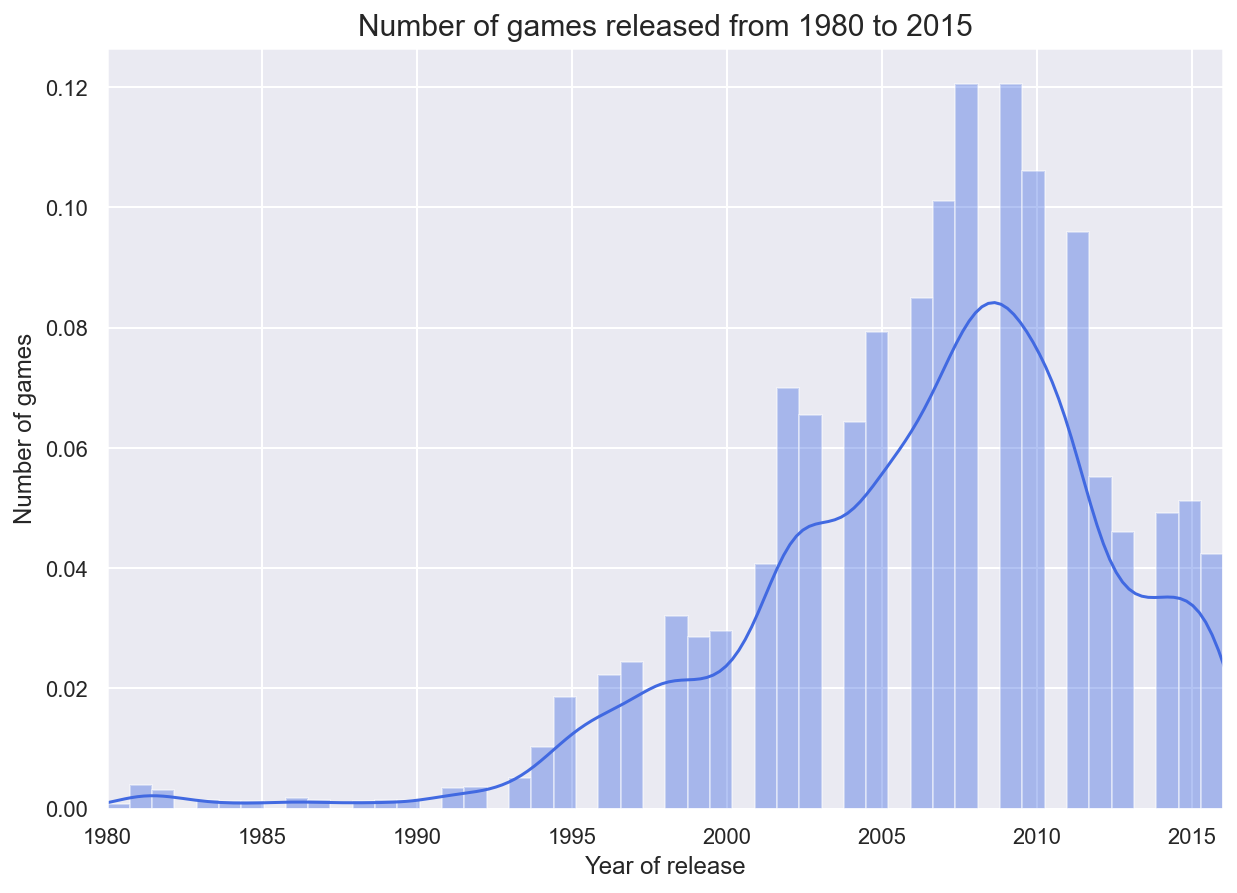

In [64]:
plt.figure(figsize=(10,7));
sns.set_theme()
sns.distplot(df['year_of_release'], color='royalblue');
plt.title('Number of games released from 1980 to 2015', size=15);
plt.xlim(1980, 2016)
plt.ylabel('Number of games', size=12);
plt.xlabel('Year of release', size=12);

Game production peaked between 2005 and 2010. Video games have evolved at a rapid pace and have become extremely popular around 2007. Then, as if the excitement among people calmed down and the games became part of the routine. Their sales after 2010 became more moderate. It most likely also depends on the technological factor - the graphics of games change with the development of technology and today it happens stably, without jerks. It makes sense to consider only the period 2002 - 2016, since the video games market before the growth of their popularity was very different from the current one.

## The most profitable platforms


In [30]:
newdf = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

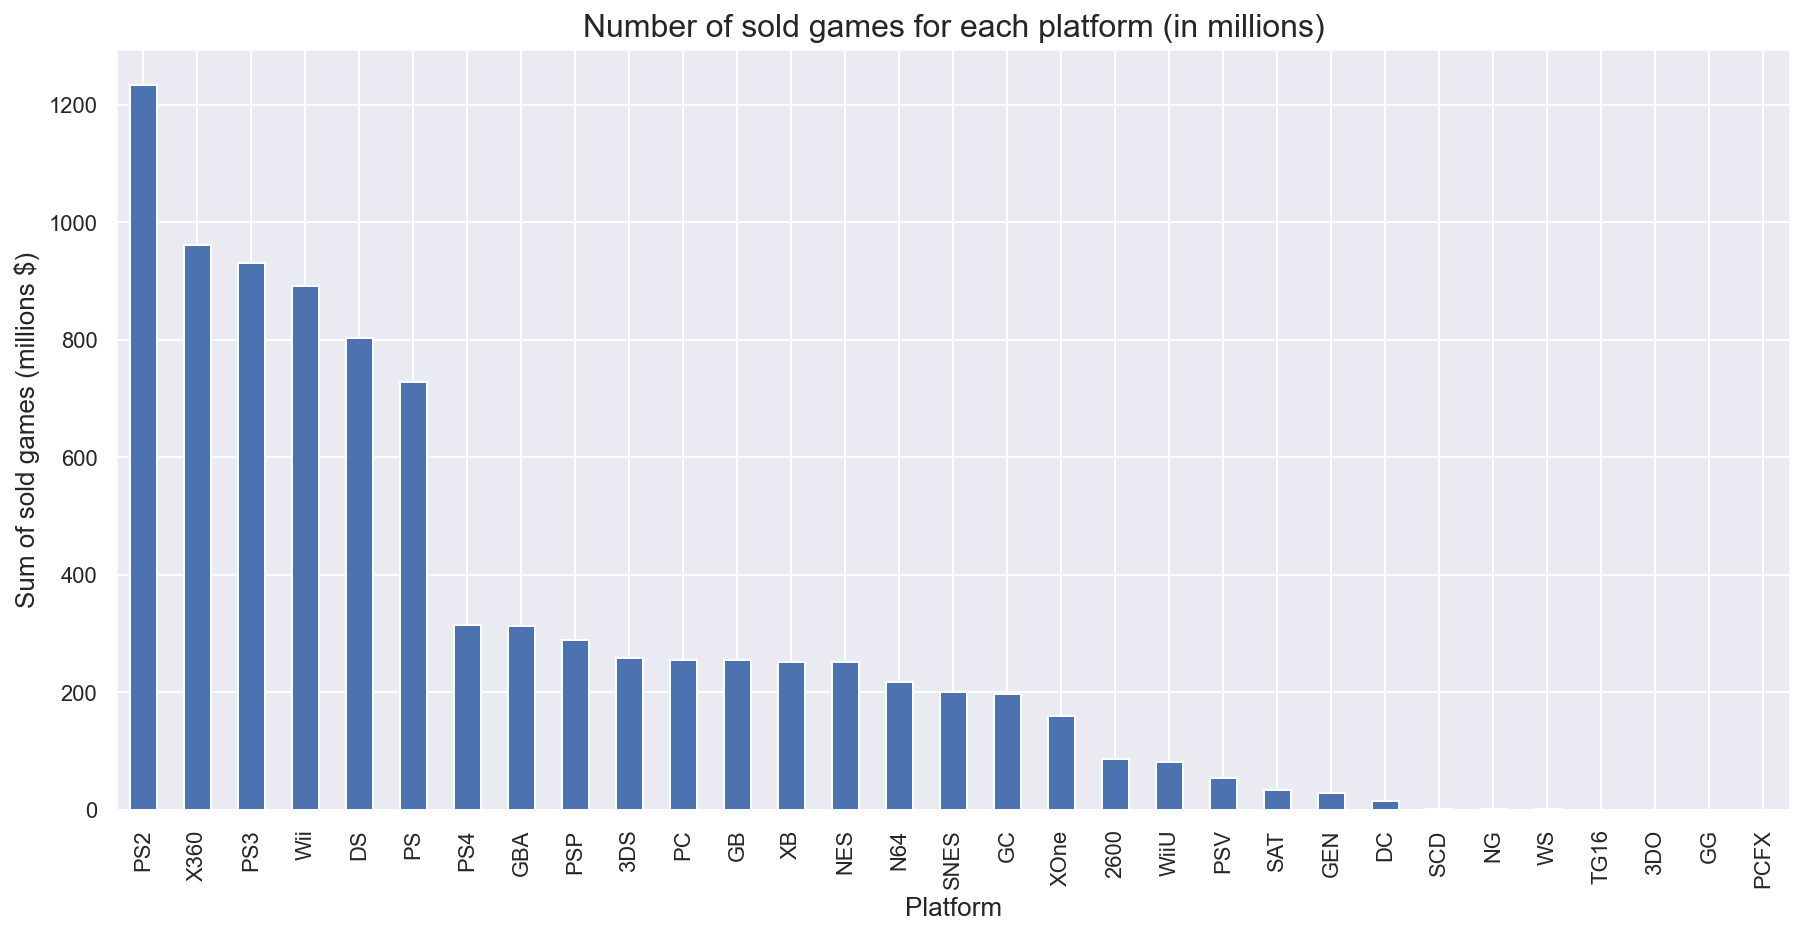

In [66]:
newdf.plot(kind='bar', y='total_sales', figsize=(15,7), legend=False)

plt.xlabel('Platform', fontsize=13)
plt.ylabel('Sum of sold games (millions $)', fontsize=13)
plt.title('Number of sold games for each platform (in millions)', fontsize=16)

plt.show();

This graph shows how the second playstation leads in sales of games, but the year of release of the consoles themselves has a strong influence on this graph. The second playstation, like the Xbox360, came out a couple of years earlier than the third playstation and Xbox One. We will select the ten most popular platforms and analyze the development of their sales over time

In [32]:
top_10 = newdf.head(10)
top_10

,total_sales
platform,
PS2,"1,233.56"
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Several mistakes appeared when building the graph, let's resolve them

In [33]:
df[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,nan,nan,unknown,0.02


DS releaser in 2004 so there's an error. Let's just delete the row

In [67]:
df = df.drop(15818, axis=0).reset_index(drop=True)

In [35]:
df[df['name'] == 'Sonic the Hedgehog']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
256,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,nan,nan,unknown,4.33
1725,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.00,4.10,E10+,1.17
1974,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.00,4.40,E10+,1.03


In [36]:
top_10_df = df[df['platform'].isin(top_10.index)]

In [37]:
df.iloc[4106, 1] = 'PS2'

In [38]:
sum_sales = top_10_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()
sum_sales = sum_sales.sort_values('total_sales', ascending=False)

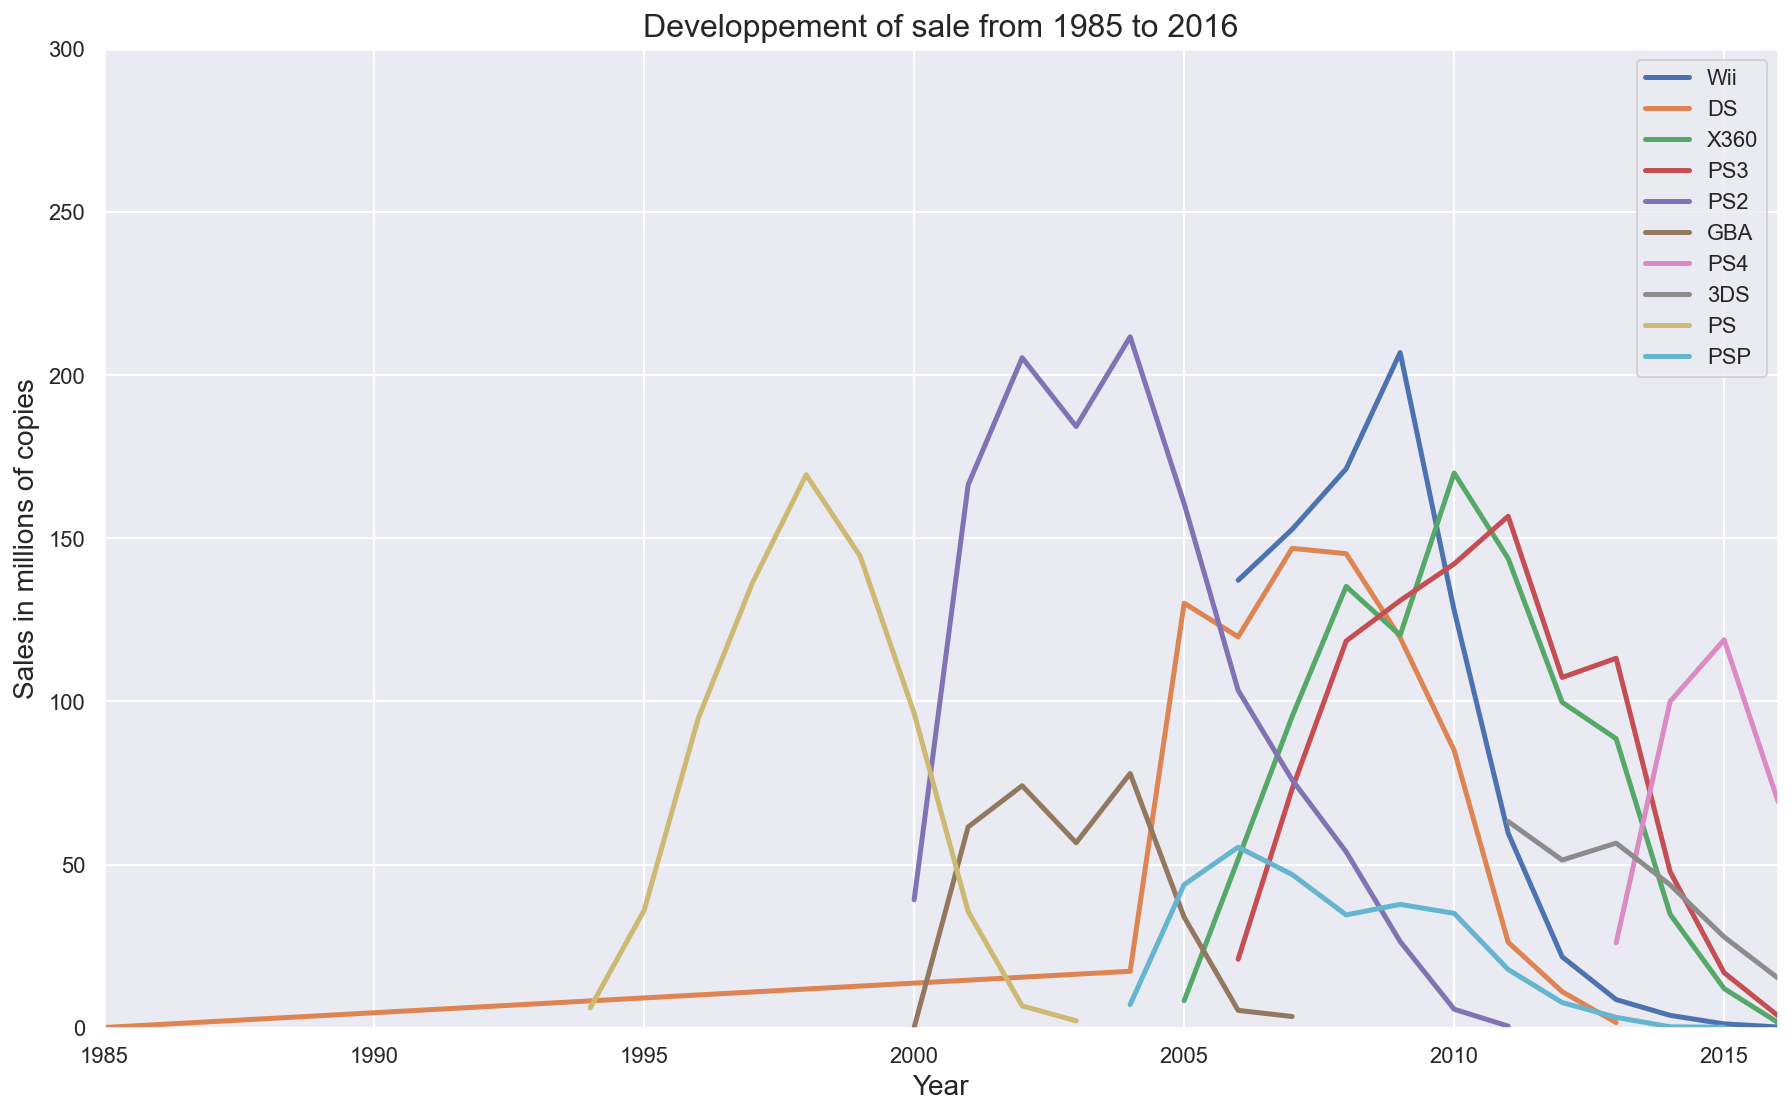

In [68]:
plt.figure(figsize=(15,9));
for name in top_10_df['platform'].unique():
    x = sum_sales[sum_sales['platform'] == name]['year_of_release']
    y = sum_sales[sum_sales['platform'] == name]['total_sales']
    sns.lineplot(x, y, label = name, ci=None, linewidth=2.5)

plt.xlabel('Year', size=14)
plt.ylabel('Sales in millions of copies', size=14)
plt.title('Developpement of sale from 1985 to 2016', size=16)
plt.xlim(1985, 2016);
plt.ylim(0, 300);
plt.legend()
plt.show()

On the graph, you can see that for most STBs sales lasted for about 8-12 years, this is the life cycle of the STB. After this period, sales fell sharply or stopped. It is also noticeable that sales of games for new consoles are growing as sales for old ones are falling.


Now we will choose a more relevant period for us and take a closer look at the most profitable platforms

Examining the period from 2010 to 2016

In [40]:
recent_df = df[df['year_of_release'] >= 2010]
recent_grouped_df = recent_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(11).reset_index()

In [41]:
top_11_recent_df = recent_df[recent_df['platform'].isin(recent_grouped_df.platform.unique())]

In [42]:
sum_recent_sales = top_11_recent_df.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum').reset_index()

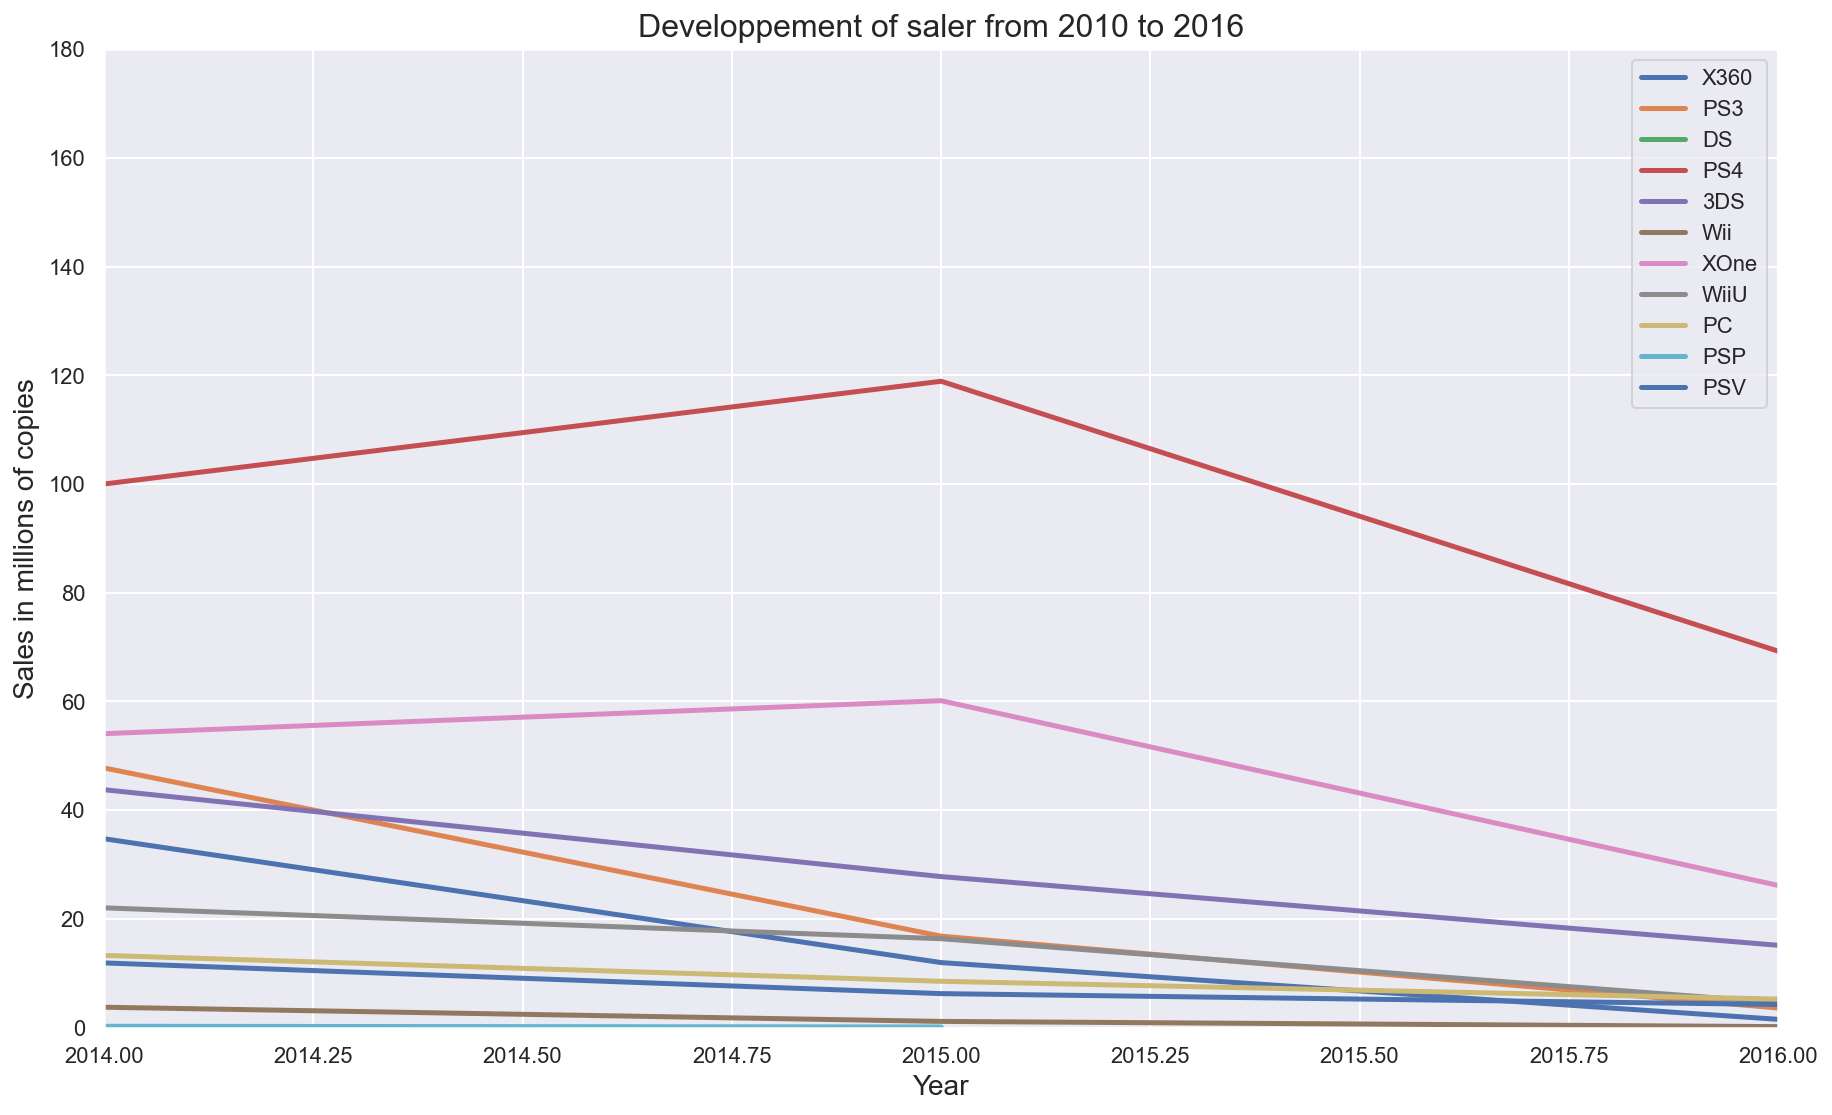

In [69]:
plt.figure(figsize=(15,9));
for name in top_11_recent_df['platform'].unique():
    x = sum_recent_sales[sum_recent_sales['platform'] == name]['year_of_release']
    y = sum_recent_sales[sum_recent_sales['platform'] == name]['total_sales']
    sns.lineplot(x, y, label = name, ci=None, linewidth=2.5)

plt.xlabel('Year', size=14)
plt.ylabel('Sales in millions of copies', size=14)
plt.title('Developpement of saler from 2010 to 2016', size=16)
plt.xlim(2014, 2016);
plt.ylim(0, 180);
plt.legend()
plt.show()

This period is more relevant for our analysis and it shows, as in the previous one, that sales are decreasing over time and old platforms become completely irrelevant. It is from 2014 to 2016 that we will work further to make a more accurate forecast for 2017.

Top 3 most profitable platforms

1. PS4
2. XOne
3. 3DS

But sales of games for top consoles are falling steadily and quite quickly.

Let's build a box plot for platforms from 2014 to 2016

In [44]:
df_recent = df[df['year_of_release'] >= 2014]

In [45]:
platform_sales = recent_df.groupby('platform')['total_sales'].median().reset_index().dropna(axis=0)
platform_sales = platform_sales.sort_values('total_sales', ascending=False)

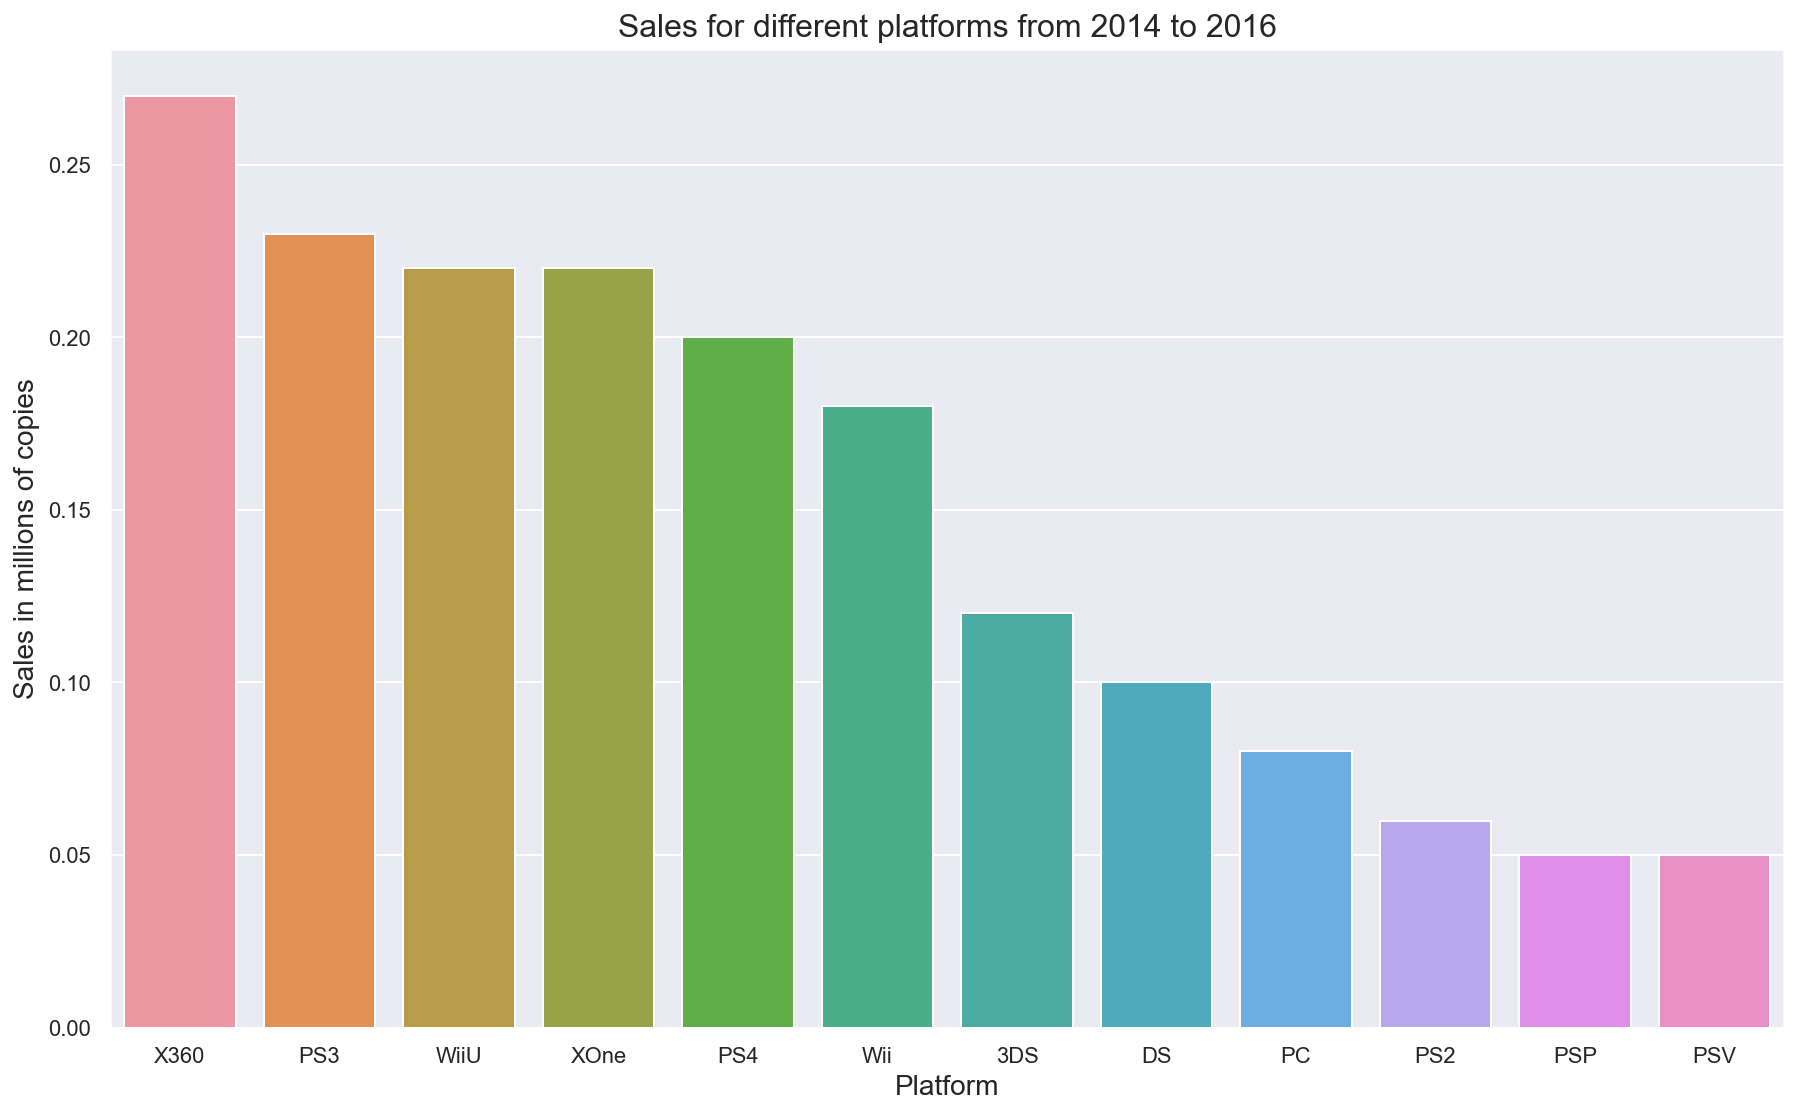

In [70]:
plt.figure(figsize=(15,9));
sns.barplot(platform_sales['platform'].sort_values(),
            platform_sales['total_sales'],
            order=platform_sales.sort_values('total_sales', ascending=False).platform);

plt.xlabel('Platform', size=14);
plt.ylabel('Sales in millions of copies', size=14);
plt.title('Sales for different platforms from 2014 to 2016', size=16);

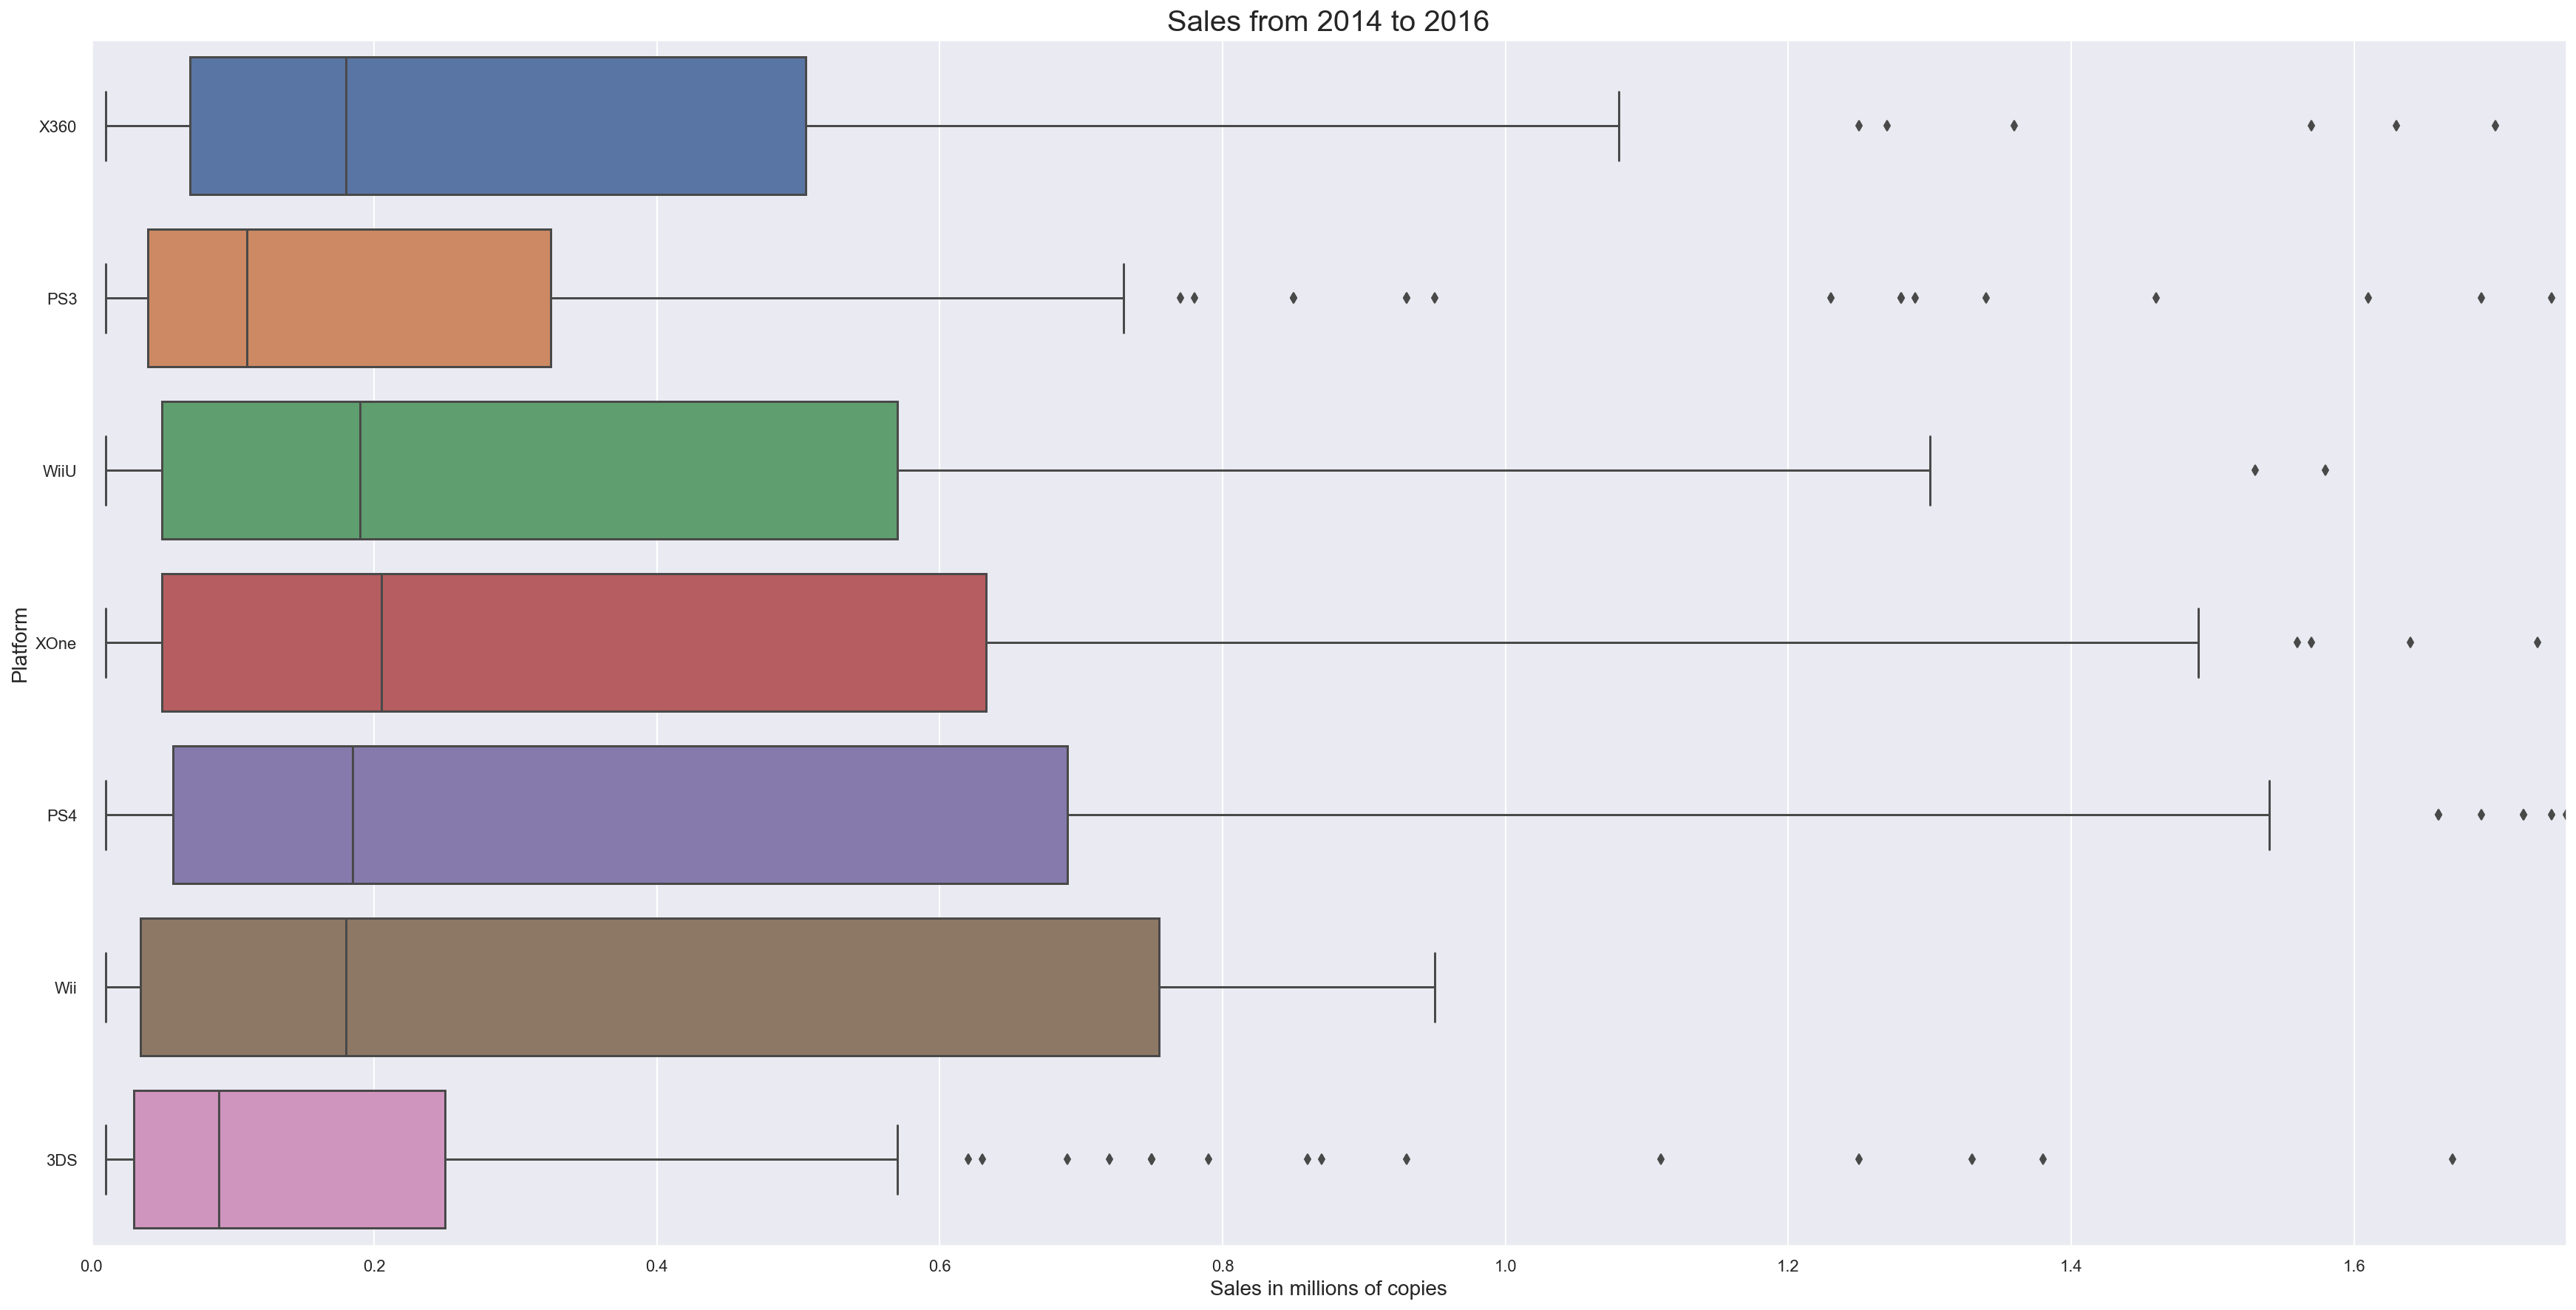

In [71]:
plt.figure(figsize=(30,15));
order = platform_sales.head(7).platform.unique()
for platform in order:
    x = df_recent[df_recent['platform'] == platform]['total_sales']
    y = df_recent[df_recent['platform'] == platform]['platform']
    sns.boxplot(x, y, order=order)

plt.xlabel('Sales in millions of copies', size=14)
plt.ylabel('Platform', size=14)
plt.xlim(0, 1.75)
plt.title('Sales from 2014 to 2016', size=20)
plt.show()

Top 5:
- XOne
- PS4
- WiiU
- Wii
- X360

In [48]:
genre_sales = recent_df.groupby('genre')['total_sales'].median().reset_index()

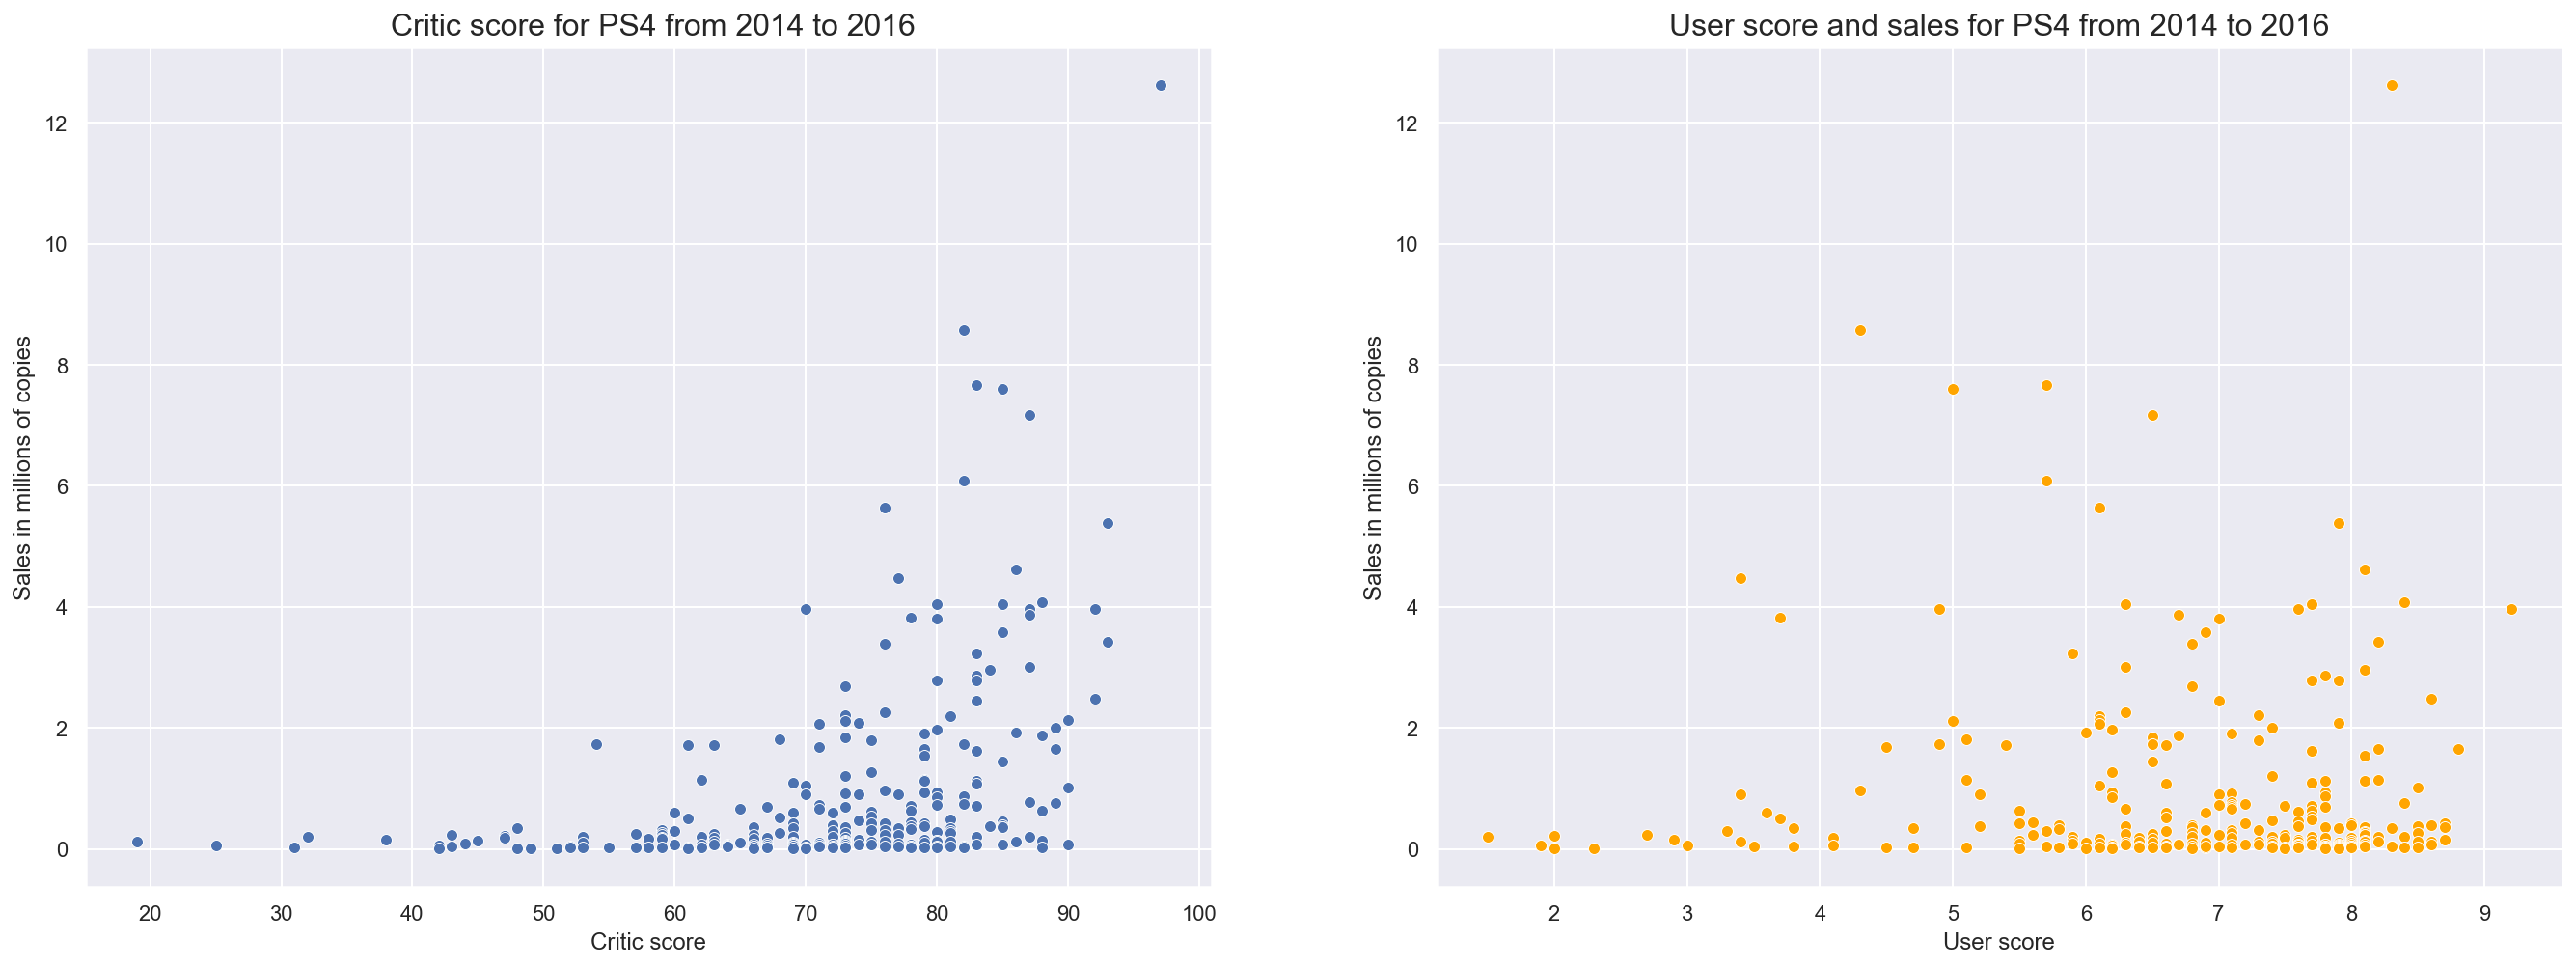

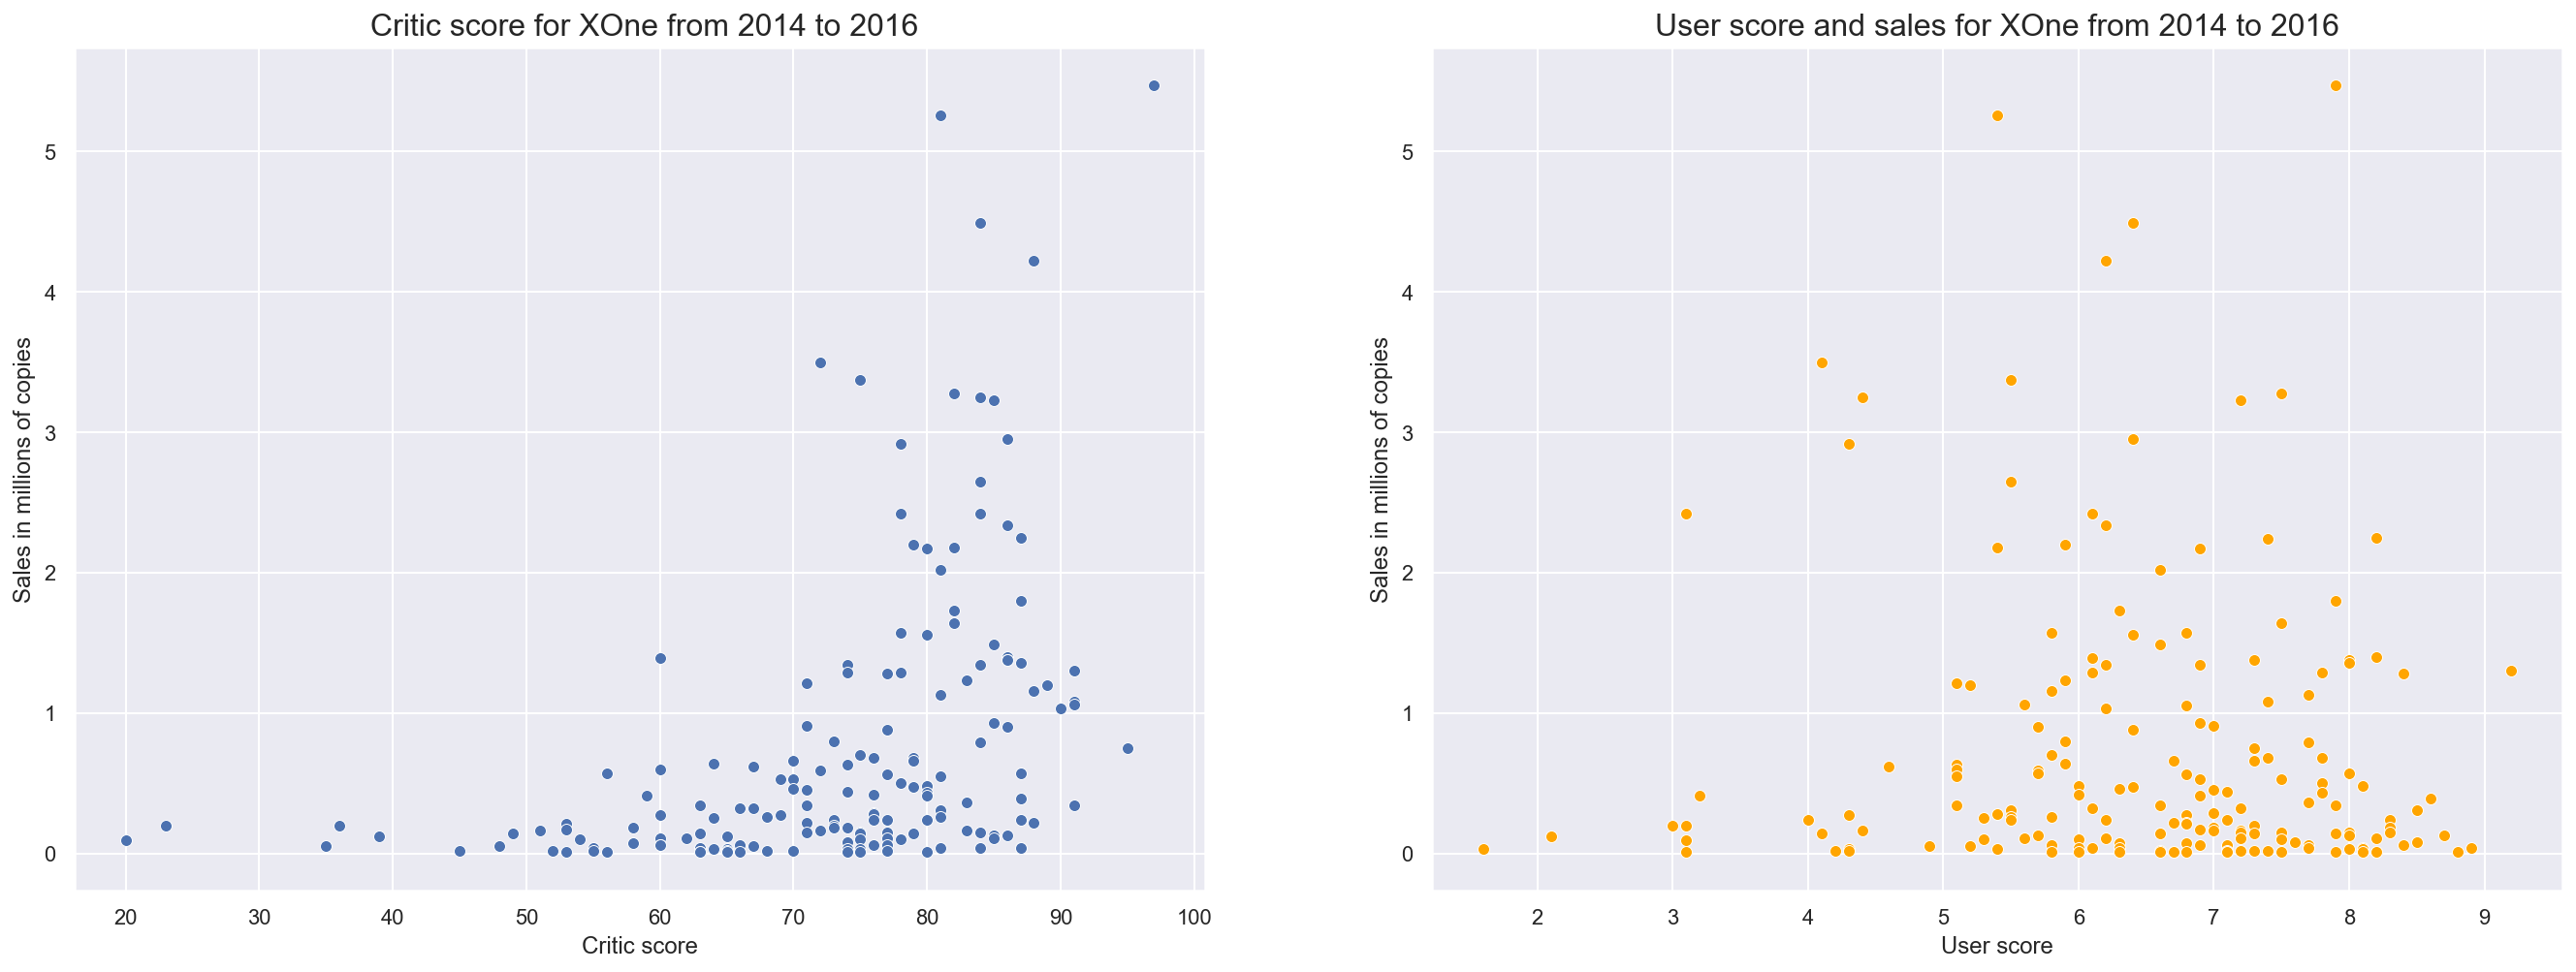

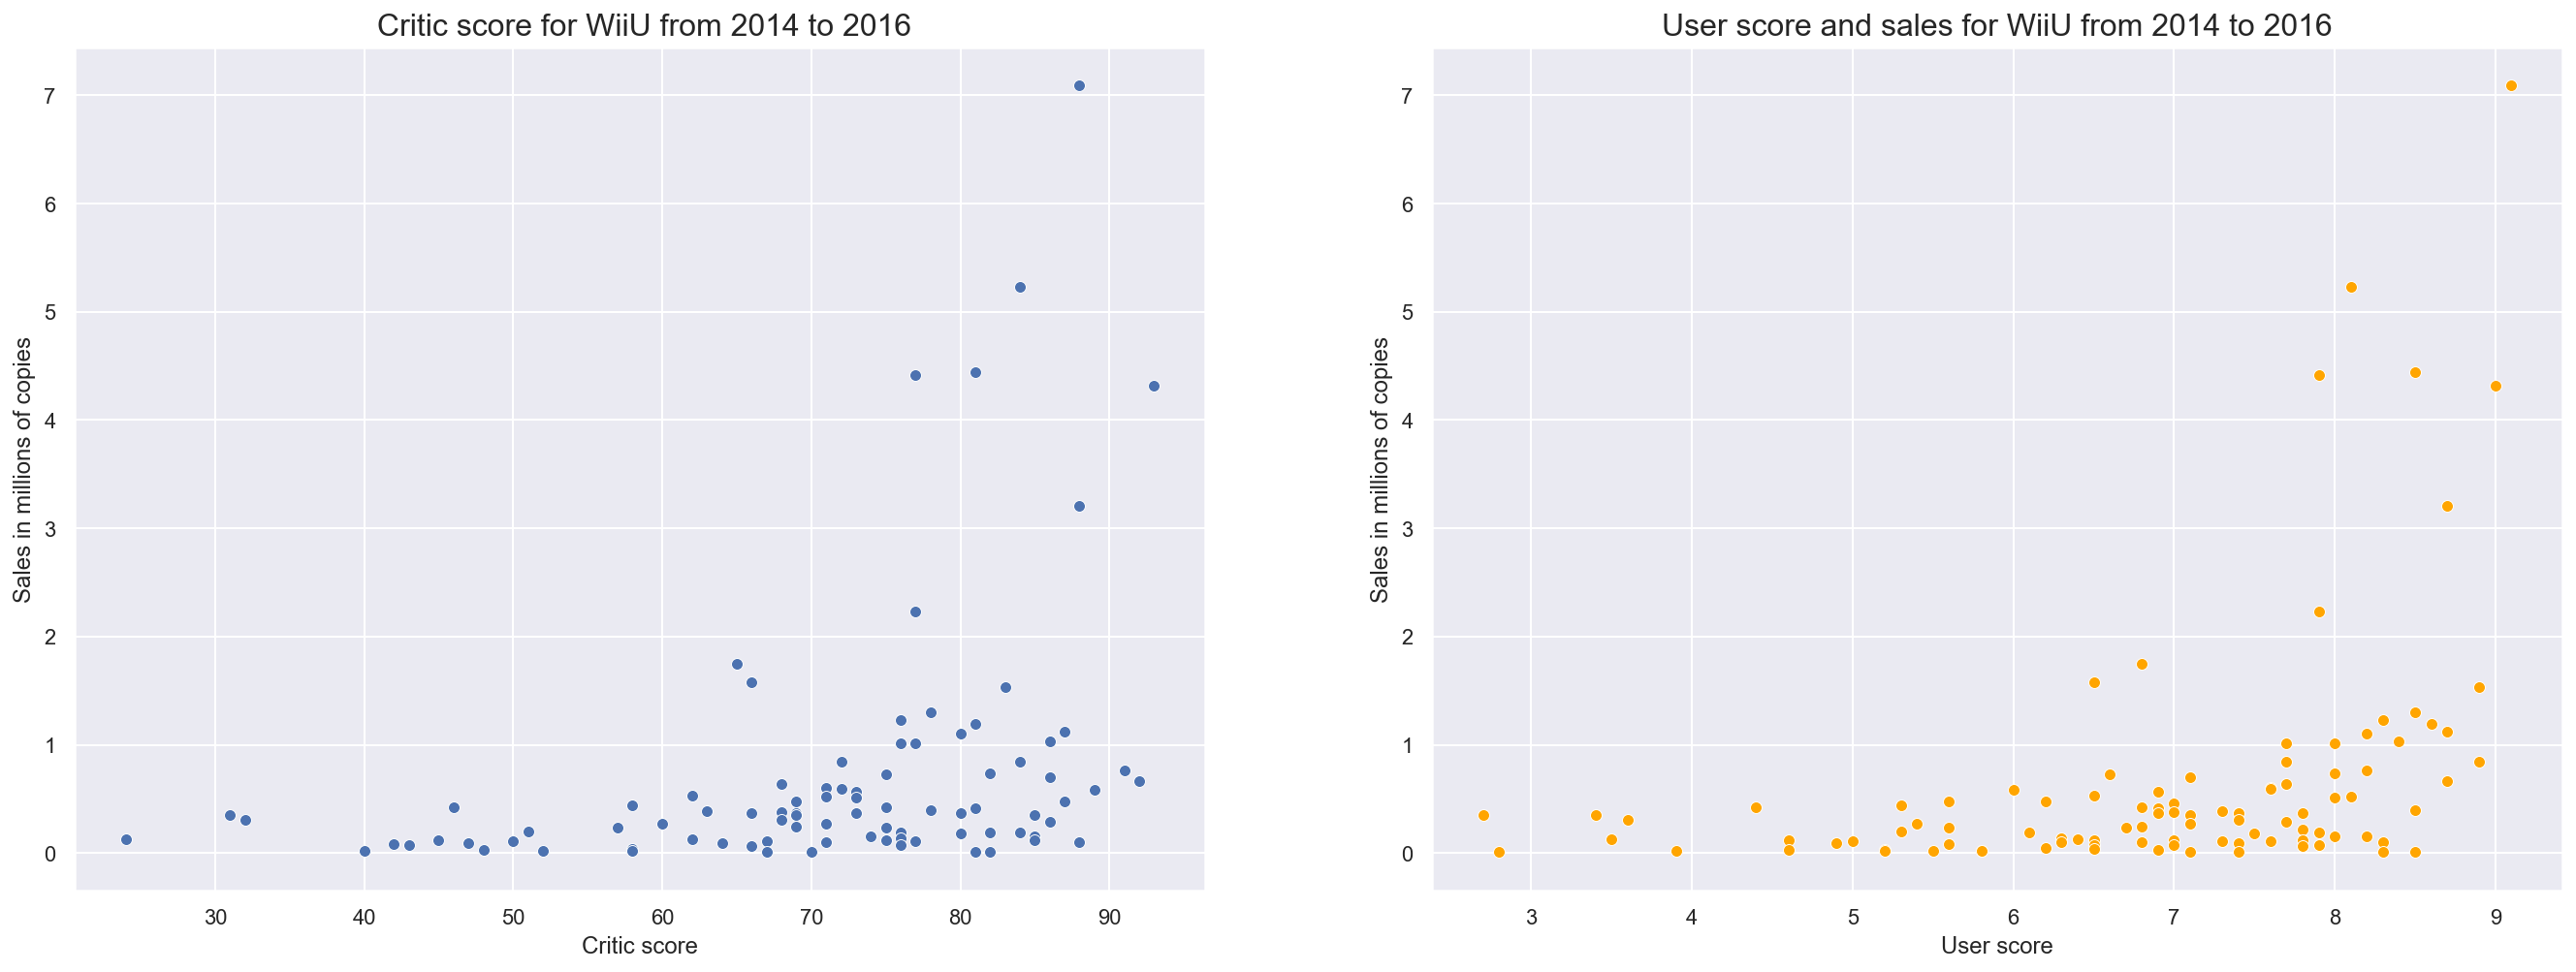

In [72]:
most_popular_platforms = ['PS4', 'XOne', 'WiiU']


for platform in most_popular_platforms:
    platform_df = recent_df[recent_df['platform'] == platform]
    fig, axes = plt.subplots(1, 2, figsize=(23, 8))
    
    
    axes[0].set(xlabel='Critic score', ylabel='Sales in millions of copies')
    axes[0].set_title(f' Critic score for {platform} from 2014 to 2016', size=16)
    
    axes[1].set(xlabel='User score', ylabel='Sales in millions of copies')
    axes[1].set_title(f'User score and sales for {platform} from 2014 to 2016', size=16)
    
    
    sns.scatterplot(platform_df['critic_score'], platform_df['total_sales'], ax=axes[0]);
    sns.scatterplot(platform_df['user_score'], platform_df['total_sales'], color='orange', ax=axes[1]);

The higher the score - the higher the rank and it's logical

In [73]:
for platform in most_popular_platforms:
    platform_df = recent_df[recent_df['platform'] == platform]
    print(f"For {platform} the correlation of critic score and sales is equal to: {platform_df['critic_score'].corr(platform_df['total_sales'])}")
    print(f"For {platform} the correlation of user score and sales is equal to: {platform_df['total_sales'].corr(platform_df['user_score'])}")
    print()

For PS4 the correlation of critic score and sales is equal to: 0.40656790102834933
For PS4 the correlation of user score and sales is equal to: -0.031957105603966945

For XOne the correlation of critic score and sales is equal to: 0.41699832684400107
For XOne the correlation of user score and sales is equal to: -0.06892505829722281

For WiiU the correlation of critic score and sales is equal to: 0.3483797599500602
For WiiU the correlation of user score and sales is equal to: 0.4002190371566136



- People buy games based on the opinion of critics - but the correlation between sales and ratings is not great

- User rating does not affect the purchase of games for Xbox and Playstation at all, although it correlates slightly with sales of games on WiiU

Let's now analyse the distribution of genres:

In [51]:
genre_sales = recent_df.groupby('genre')['total_sales'].median().reset_index()

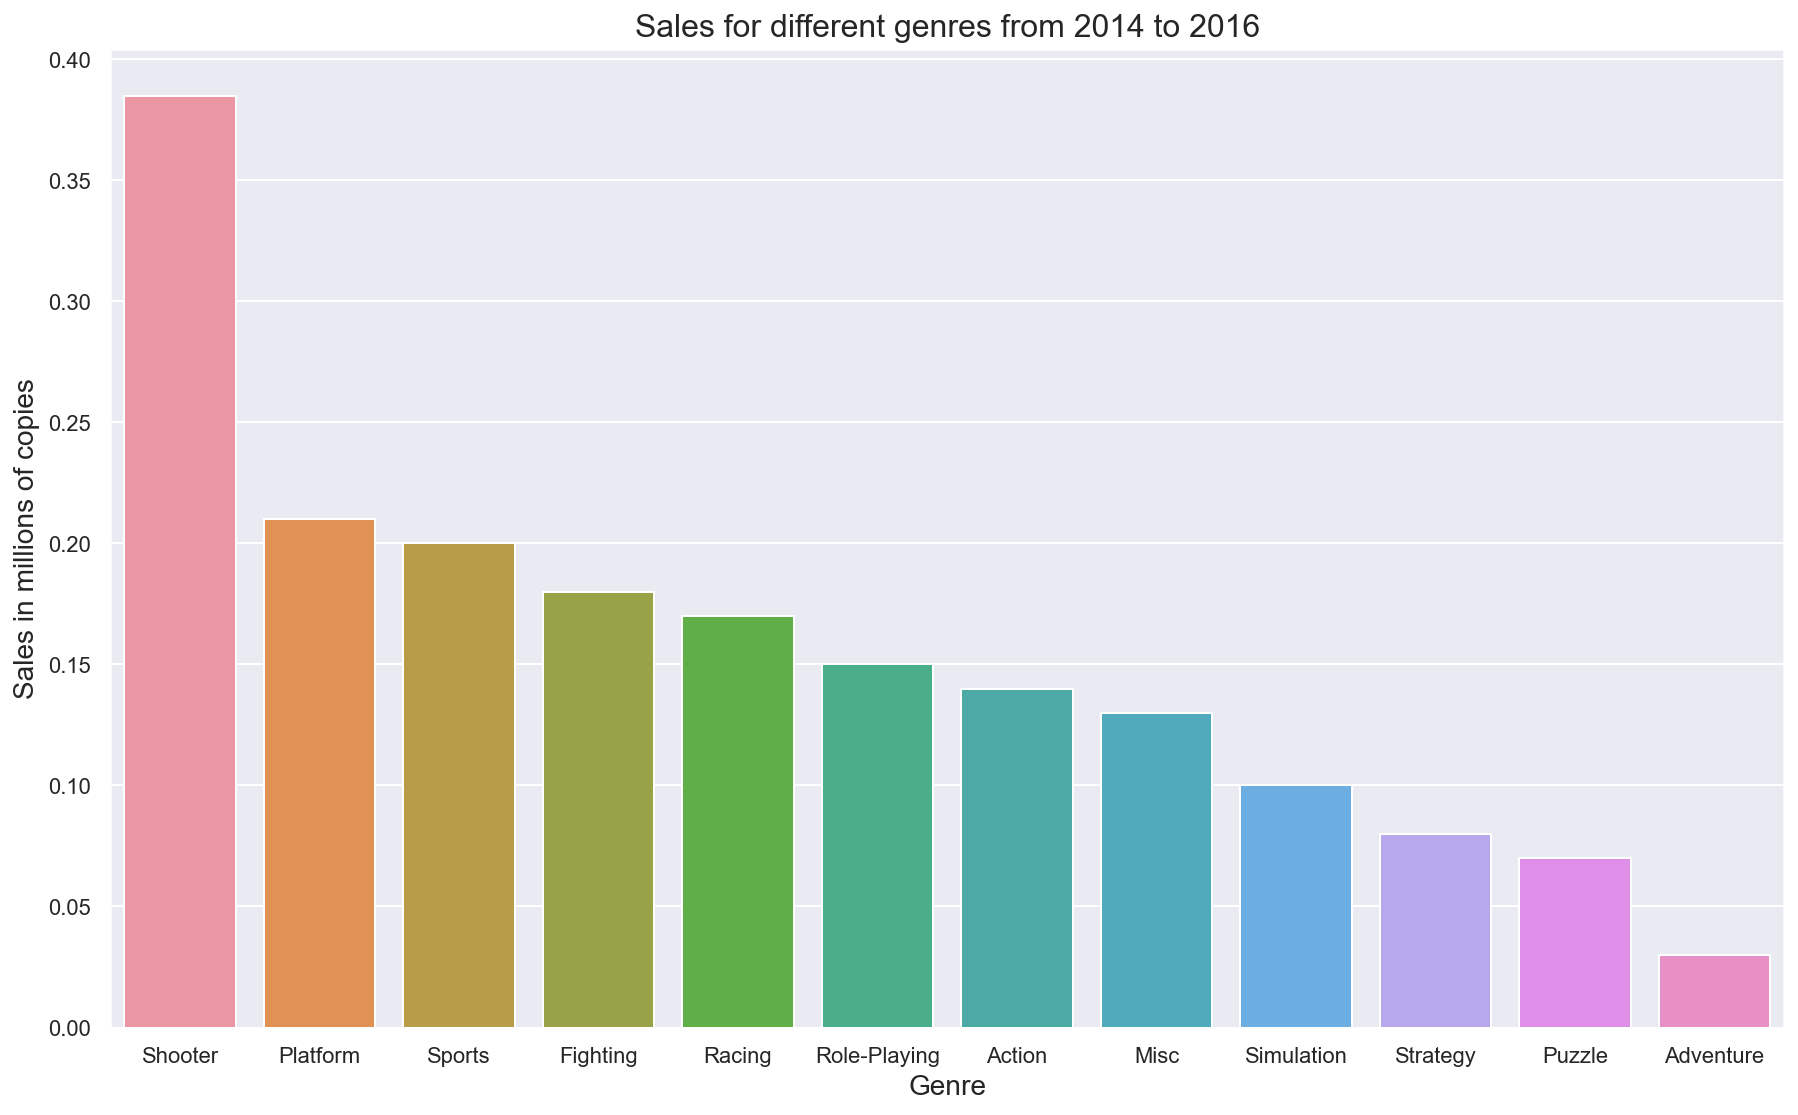

In [74]:
plt.figure(figsize=(15,9));
sns.barplot(genre_sales['genre'].sort_values(), genre_sales['total_sales'], order=genre_sales.sort_values('total_sales', ascending=False).genre);

plt.xlabel('Genre', size=14);
plt.ylabel('Sales in millions of copies', size=14);
plt.title('Sales for different genres from 2014 to 2016', size=16);

The most popular genre for all platforms from 2014 to 2016 was Shooter

The difference between genres is noticeable - on average, under 1.2 million sales for Shooter and about 100,000 for the Adventure genre - about 12 times less

# Users per region <a class="anchor" id="4"></a>

In [76]:
region_dict = {
    'Japan': 'jp_sales',
    'NA': 'na_sales',
    'Europe': 'eu_sales'
}

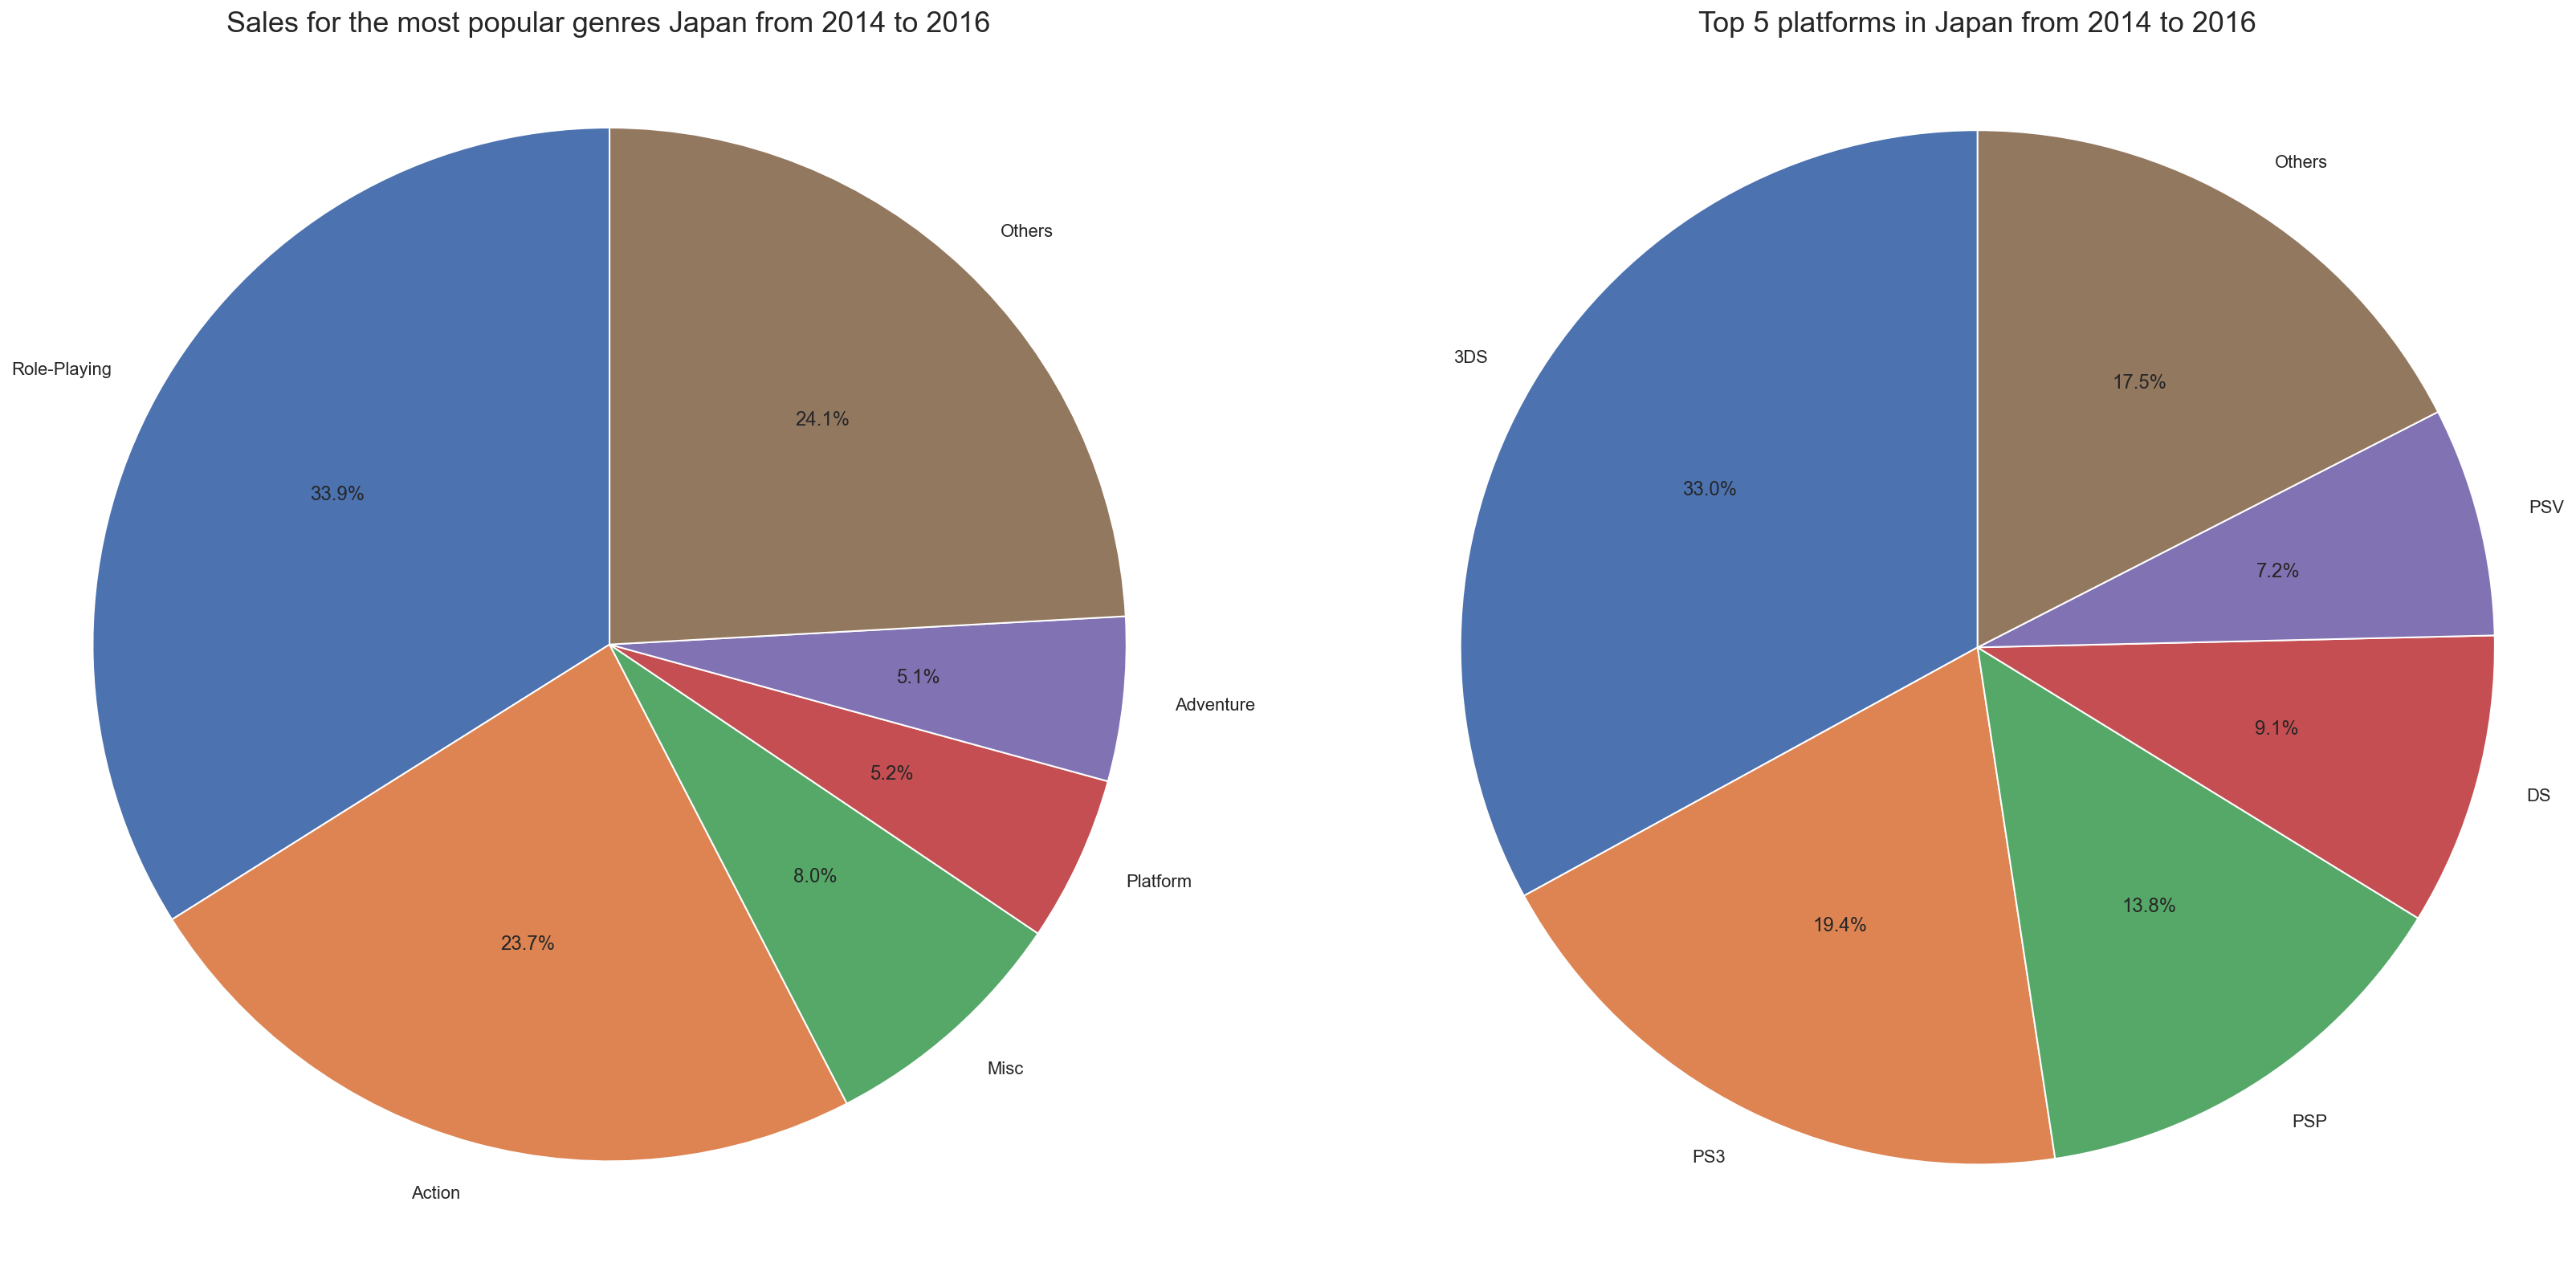

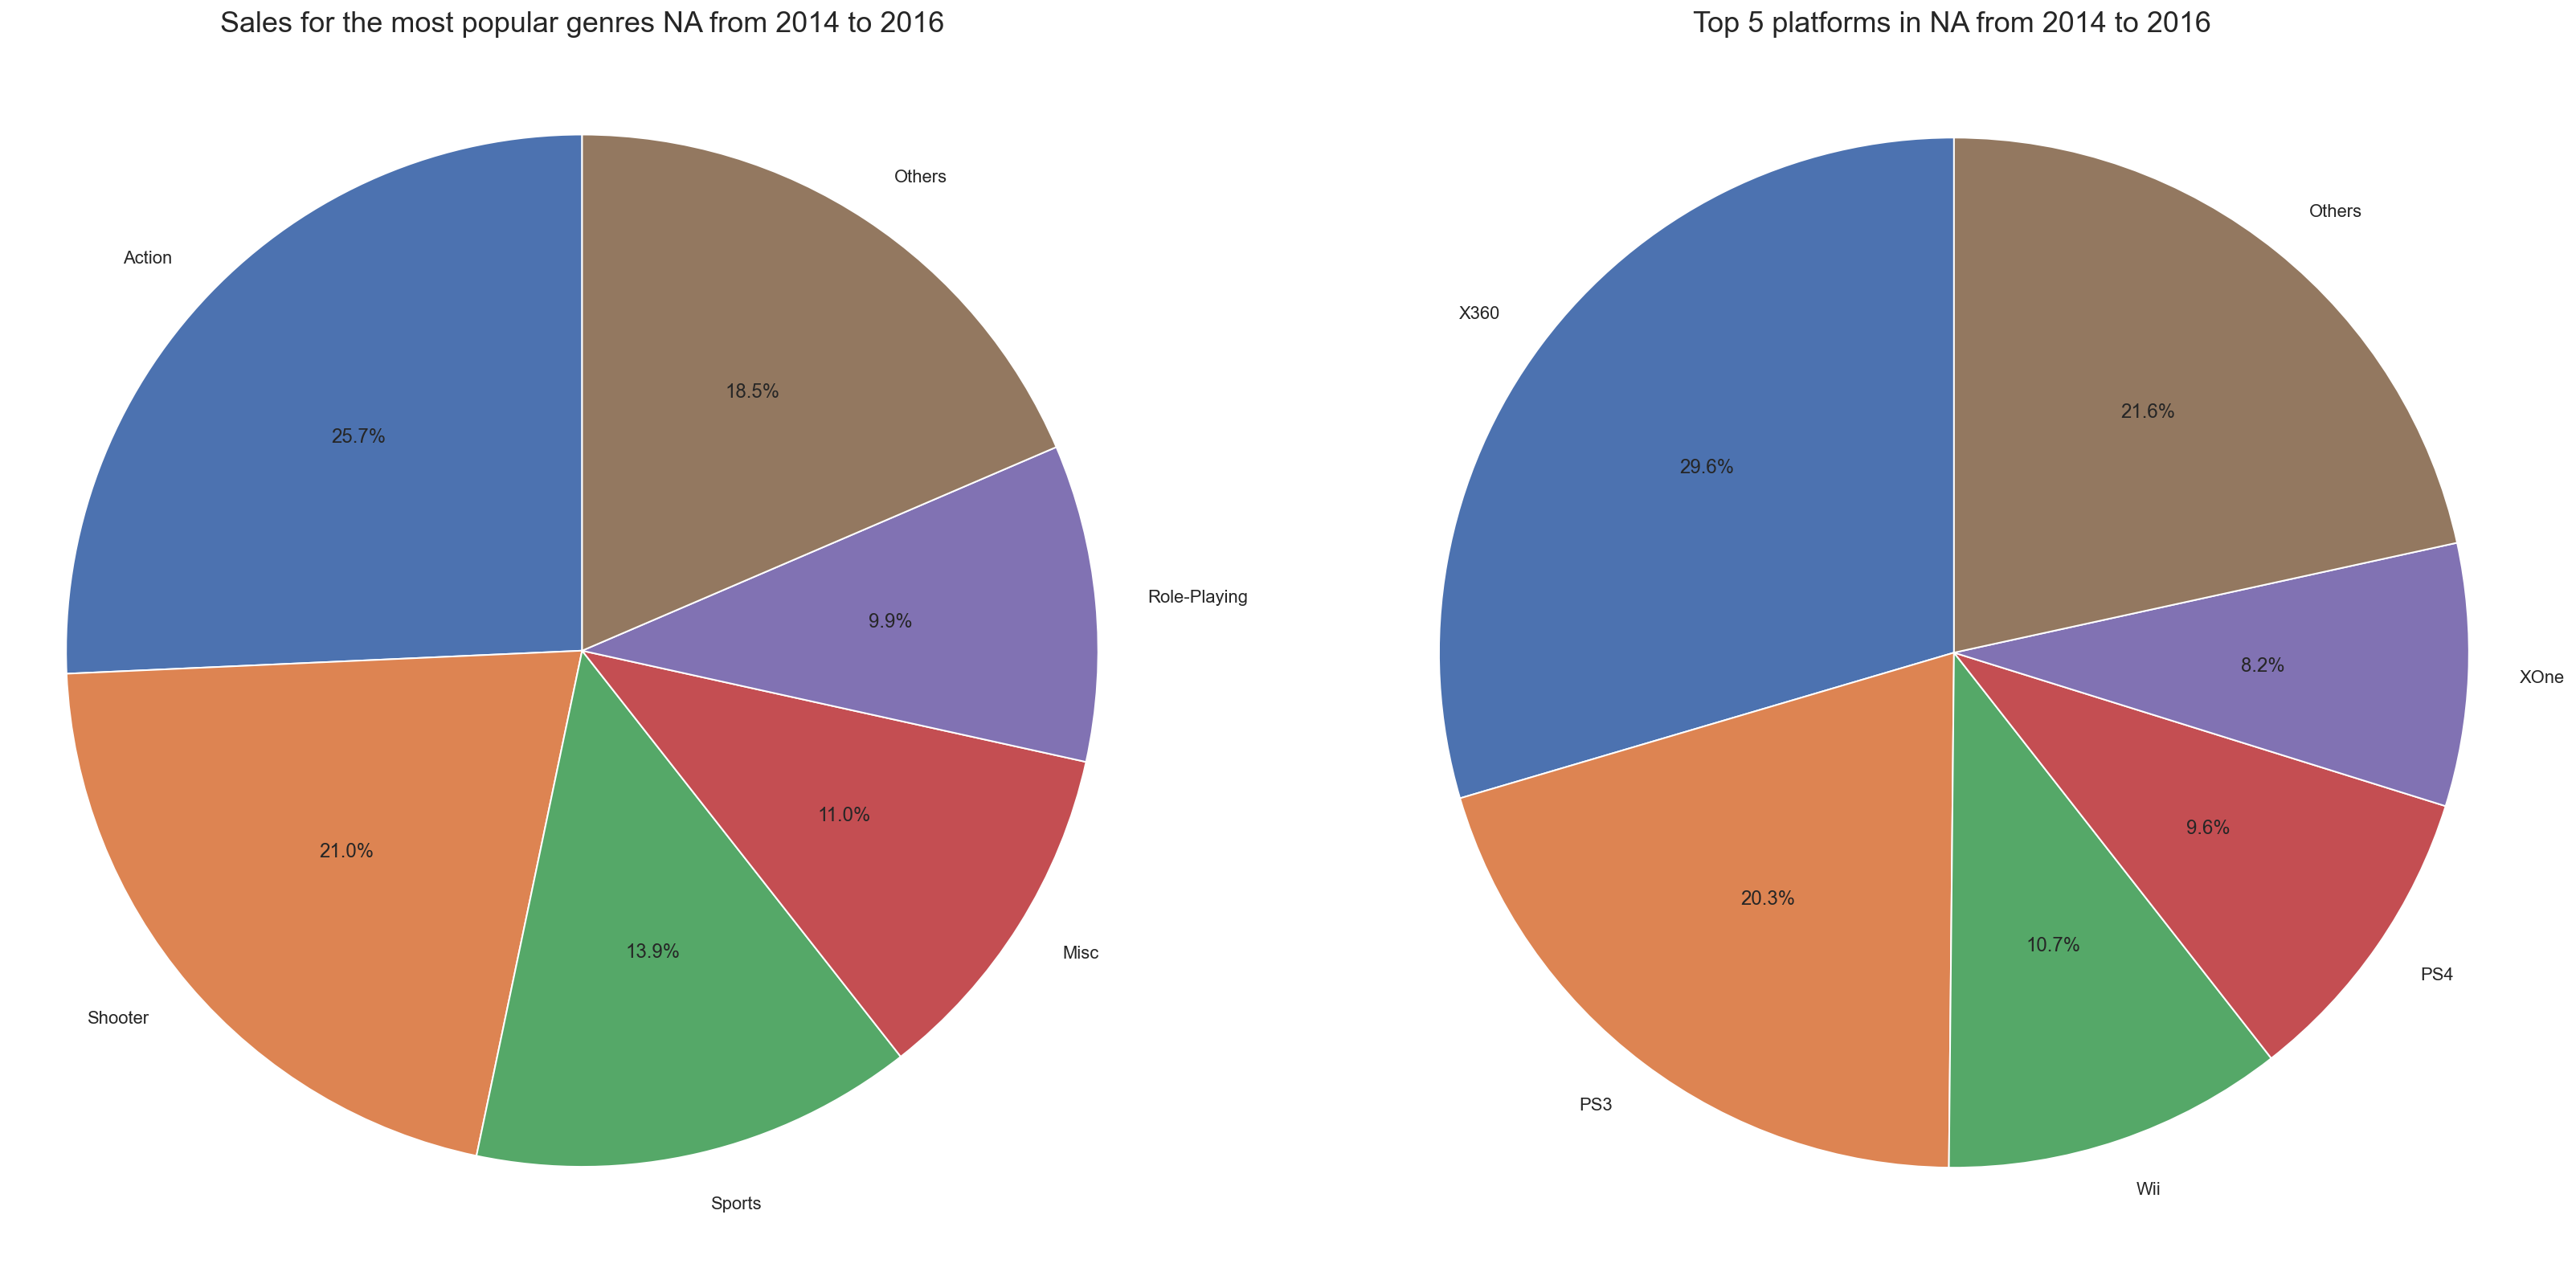

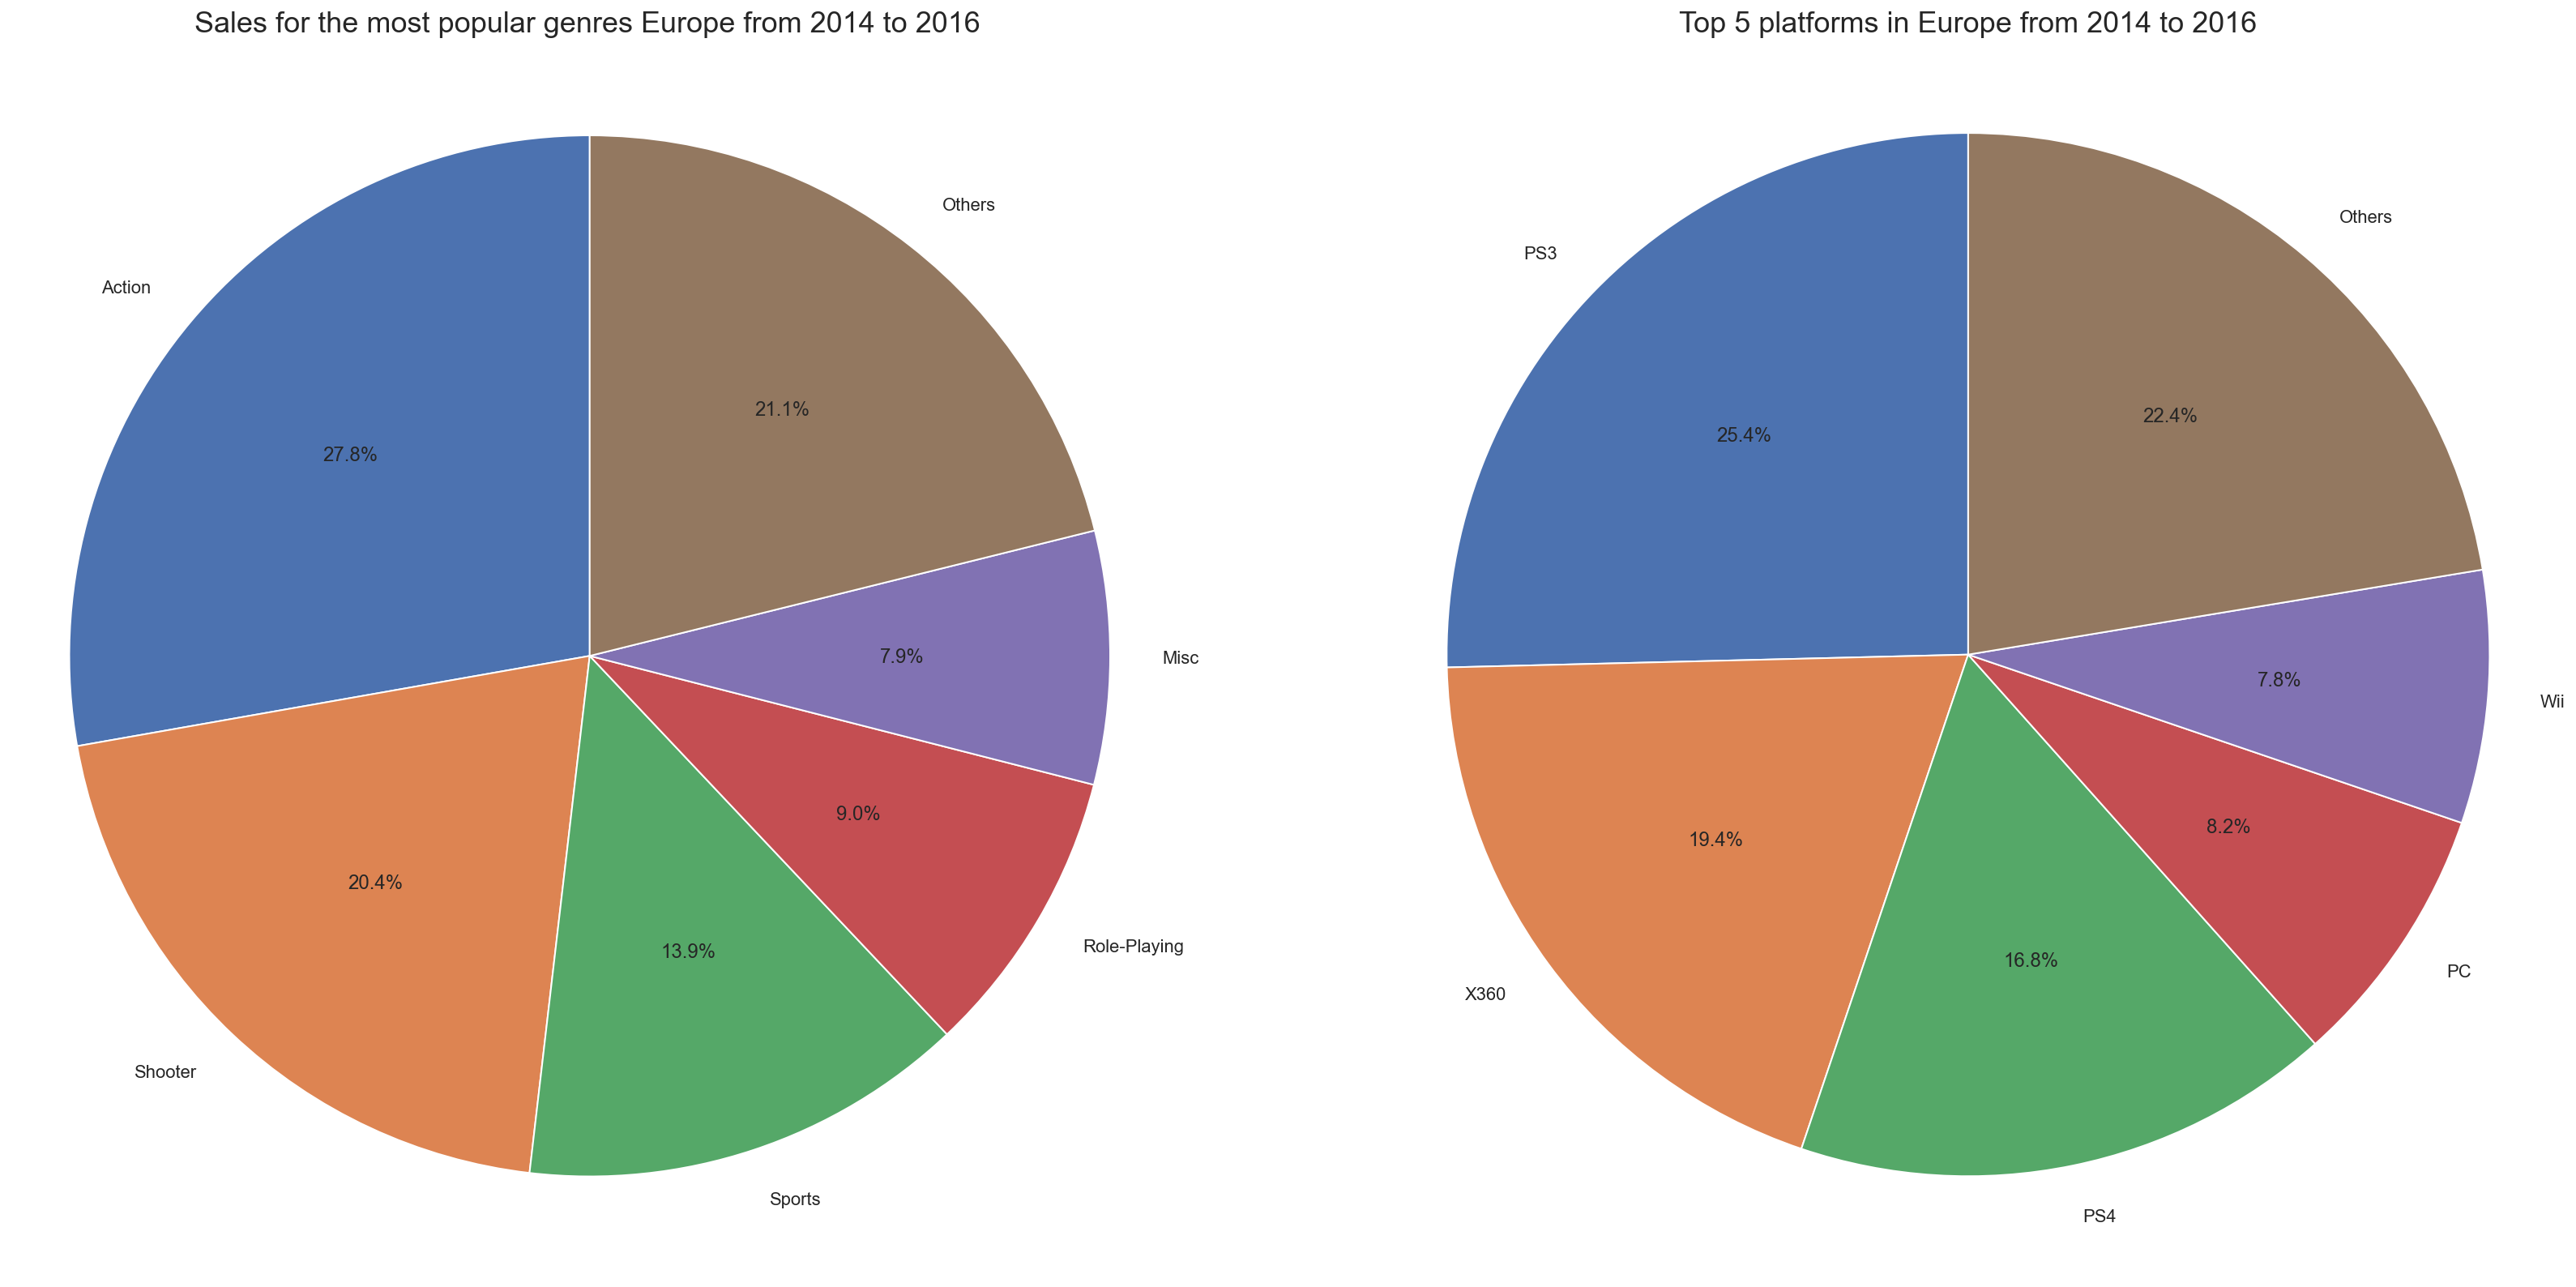

In [77]:
for name, column_name in region_dict.items():
    genre_chart = recent_df.groupby(['genre'])[column_name].sum().sort_values(ascending=False).reset_index()
    genre_top5 = genre_chart.head(5)
    other_genres = pd.DataFrame(
        data = {
            'genre' : ['Others'],
            column_name : [genre_chart[column_name][5:].sum()]})

    final_genre = pd.concat([genre_top5, other_genres])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 14))
    
    ax1.set_title(f'Sales for the most popular genres {name} from 2014 to 2016', size=18)
    ax1.pie(final_genre[column_name], labels=final_genre['genre'], autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')
    
    platform_chart = recent_df.groupby(['platform'])[column_name].sum().sort_values(ascending=False).reset_index()
    platform_top5 = platform_chart.head(5)
    other_platforms = pd.DataFrame(
        data = {
            'platform' : ['Others'],
            column_name : [platform_chart[column_name][5:].sum()]})

    final_platform = pd.concat([platform_top5, other_platforms])
    
    ax2.set_title(f'Top 5 platforms in {name} from 2014 to 2016', size=18)
    ax2.pie(final_platform[column_name], labels=final_platform['platform'], autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')


    

In [55]:
for column_name in region_dict.values():
    platform_table = recent_df.groupby('platform')[column_name].mean().sort_values(ascending=False).reset_index().head(5)
    platform_table['total_percent'] = platform_table[column_name] / platform_table[column_name].sum()
    display(platform_table.head())

,platform,jp_sales,total_percent
0,3DS,0.20,0.40
1,WiiU,0.09,0.18
2,PSP,0.08,0.17
3,PS3,0.07,0.14
4,DS,0.06,0.11


,platform,na_sales,total_percent
0,X360,0.49,0.29
1,XOne,0.38,0.23
2,PS4,0.28,0.17
3,Wii,0.27,0.16
4,WiiU,0.26,0.15


,platform,eu_sales,total_percent
0,PS4,0.36,0.29
1,X360,0.24,0.20
2,PS3,0.24,0.20
3,XOne,0.21,0.17
4,WiiU,0.17,0.14


In Japan, 53% of all sales are 3DS games.
PSP in top 3 in Japan Indicates People like portable consoles

In North America, xbox360 leads in average sales, and in Europe the leader is PlayStation 4. But in America, XONE takes the second place, behind xbox360 by 10 percent.

Let's check if the ESRB influences the regional sales

In [56]:
recent_df.groupby('rating')['jp_sales'].agg(['sum', 'count']).sort_values('sum', ascending=False).reset_index()

,rating,sum,count
0,unknown,171.49,2164
1,E,47.87,938
2,T,42.11,847
3,M,30.45,719
4,E10+,13.22,603
5,other,0.00,6


Japan has the most sales for ratings:
- Unknown - Unknown or undefined rating
- E - Games for everyone
- T - Games for teenagers (13 and up)
- M - Games for older adults (17+)
- E10 + - Games for everyone over 10

In [57]:
recent_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()

,rating,na_sales
0,M,382.22
1,E,271.15
2,T,160.81
3,E10+,159.38
4,unknown,155.72
5,other,1.13


The situation is different in America - most sold games are in the category 17+

In [58]:
recent_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()

,rating,eu_sales
0,M,292.04
1,E,197.34
2,unknown,139.44
3,T,113.08
4,E10+,99.28
5,other,0.03


In Europe, the situation is similar to the American one, but those who play games with an indefinite or non-natural genre are proportionally greater than in America. Also in America there are more sales for the E10 + rating

We can say that rating affects sales. According to the consumption habits of a particular region, the rating will indicate which types of games are more likely to sell. However, there are a lot of games on sale - from inaccessible or unknown categories, and this fact makes the rating an unreliable factor in our analysis.

# Hypothesis testing <a class="anchor" id="5"></a>

## Hypothesis 1

*Н0*: The average user scores for XOne and PC are equal 

*H1*: The average user scores for XOne and PC are not equal

Let's test the hypothesis from 2014 to 2016

In [59]:
df_recent[df_recent['platform'].isin(['XOne', 'PC'])].groupby('platform')['user_score'].mean().sort_values().head(2).reset_index()

,platform,user_score
0,PC,6.30
1,XOne,6.59


In [79]:
xbox = df_recent[(df_recent['platform'] == 'XOne') & (df_recent['user_score'] > 0)]['user_score']
pc = df_recent[(df_recent['platform'] == 'PC') & (df_recent['user_score'] > 0)]['user_score']

alpha = 0.01
results = st.ttest_ind(xbox, pc, equal_var=False)

if results.pvalue < alpha:
    print(f'pvalue={results.pvalue}')
    print('The average user score for XOne and PC are not equal with 1% significance, H0 is rejected .')
else:
    print(f'pvalue={results.pvalue}')
    print('The average user score for XOne and PC are equal with 1% significance, could not reject the H0')
    

pvalue=0.1160154559677266
The average user score for XOne and PC are equal with 1% significance, could not reject the H0


## Hypothesis 2

*H0*: Average user rating values ​​for Action and Sport genres are equal

*H1*: Average user ratings for Action and Sport genres are different

Use again Student's ttest with the same significance level of 0.01

In [81]:
action = df_recent[(df_recent['genre'] == 'Action') & (df_recent['user_score'] > 0)]['user_score']
sports = df_recent[(df_recent['genre'] == 'Sports') & (df_recent['user_score'] > 0)]['user_score']

alpha = 0.01
results = st.ttest_ind(action, sports, equal_var=False)

if results.pvalue < alpha:
    print(f'pvalue={results.pvalue}')
    print('The average user score for Sports and Action genres are not equal with 1% significance level, H0 is rejected')
    print(f'pvalue={results.pvalue}')
    print('The average user score for Sports and Action genres are equal with 1% significance level, could not reject H0')

pvalue=1.1825639880196408e-14
The average user score for Sports and Action genres are not equal with 1% significance level, H0 is rejected
pvalue=1.1825639880196408e-14
The average user score for Sports and Action genres are equal with 1% significance level, could not reject H0


In [82]:
df_recent[df_recent['genre'].isin(['Sports', 'Action'])].groupby('genre')['user_score'].mean().sort_values().head(2).reset_index()

,genre,user_score
0,Sports,5.23
1,Action,6.76


# General Conclusion <a class="anchor" id="6"></a>

The study revealed:

- In 2007-2010, sales of games were at their peak and since then have been slowly falling
- In Japan, the approach to games is different - they play more in pocket consoles and prefer the RPG genre
- User preferences are similar in Europe and America, Action and Shooter genres are very popular in both regions
- Action leads in overall sales but Shooter in average
- Pocket consoles are not popular in these regions, the first places are occupied by Xbox in America and Playstation in Europe
- The computer remains a popular platform in Europe, but not in America or Japan
- Console life cycle 7-9 years
- The sales of games and their popularity are not strongly influenced by the reviews of critics but not the reviews of the players
- Player feedback counts more in Japan

Hypothesis testing showed:
- The ratings of PC and XOne users are on average equal
- User ratings for Action and Sports genres differ on average

Forecast for 2017:

- Most profitable market - North America and Europe, Japan in third place


If you release a game in America, then XboxOne and PS4 should be chosen in the Shooter genre with ESRB rating M
- PS3 and Xbox are still popular but their sales will drop more rapidly than PS4 and XOne as they belong to the previous generation of consoles



